In [2]:
import pandas as pd

# Load the data
df = pd.read_excel('recalculated_fares.xlsx')

# Quick check
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'recalculated_fares.xlsx'

In [ ]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from geopy.distance import geodesic

# Function to calculate distance
def calculate_distance(row):
    pickup = (row['Pickup Latitude'], row['Pickup Longitude'])
    dropoff = (row['Dropoff Latitude'], row['Dropoff Longitude'])
    return geodesic(pickup, dropoff).km

# Apply the function to each row
df['distance_km'] = df.apply(calculate_distance, axis=1)

# Check the new column
df[['Pickup Location', 'Dropoff Location', 'distance_km']].head()


NameError: name 'df' is not defined

In [1]:
df.head()  # Shows the first 5 rows, including new columns


NameError: name 'df' is not defined

In [ ]:
df.columns  # Lists all column names, should include 'distance_km'


Index(['key', 'fare_amount', 'pickup_datetime', 'passenger_count',
       'Pickup Location', 'Pickup Latitude', 'Pickup Longitude',
       'Dropoff Location', 'Dropoff Latitude', 'Dropoff Longitude',
       'Ride_Date', 'trip_duration', 'dropoff_datetime', 'Outlier_Flag',
       'fare_per_minute', 'distance_km'],
      dtype='object')

In [ ]:
df['distance_km'].isnull().sum()  # Should show 0 if everything is correct


np.int64(0)

In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['key', 'Ride_Date', 'dropoff_datetime', 'fare_per_minute'])

# Check the updated DataFrame
df.head()
df.columns  # Confirm that the columns are dropped


Index(['fare_amount', 'pickup_datetime', 'passenger_count', 'Pickup Location',
       'Pickup Latitude', 'Pickup Longitude', 'Dropoff Location',
       'Dropoff Latitude', 'Dropoff Longitude', 'trip_duration',
       'Outlier_Flag', 'distance_km'],
      dtype='object')

In [ ]:
df.head()

,fare_amount,pickup_datetime,passenger_count,Pickup Location,Pickup Latitude,Pickup Longitude,Dropoff Location,Dropoff Latitude,Dropoff Longitude,trip_duration,Outlier_Flag,distance_km
0,189,2024-02-09 11:39:00,1,Anna Nagar,13.0878,80.2105,Guindy,13.0078,80.2209,23,False,8.922067
1,249,2023-02-24 22:03:00,1,Chennai Central Railway Station,13.0827,80.2707,Marina Beach,13.0500,80.2824,44,False,3.833729
2,507,2022-07-10 20:31:00,1,Guindy,13.0072,80.2209,Porur,13.0358,80.1600,45,False,7.324778
3,390,2021-05-15 15:27:00,3,Marina Beach,13.0500,80.2824,Anna Nagar,13.0878,80.2105,31,False,8.848452
4,306,2022-08-08 05:11:00,5,Perambur,13.1204,80.2446,Velachery,12.9766,80.2182,44,False,16.164367


In [ ]:
df.to_csv("recalculated_fares.csv", index=False)


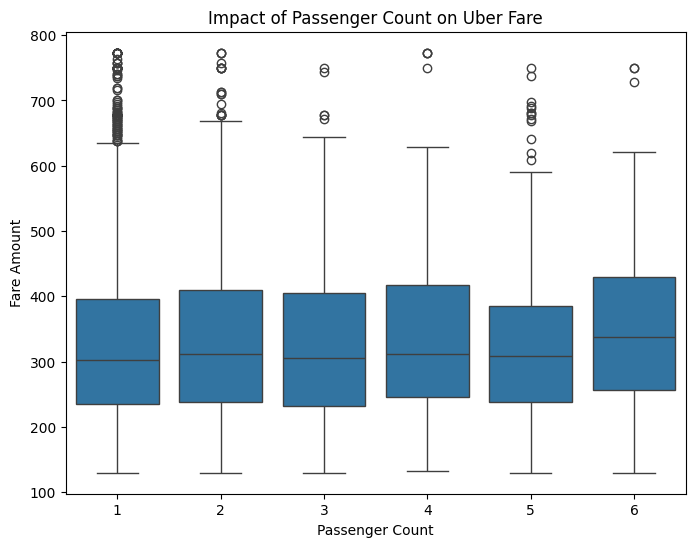

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("recalculated_fares.csv")

# Set plot size
plt.figure(figsize=(8, 6))

# Create a boxplot
sns.boxplot(x="passenger_count", y="fare_amount", data=df)

# Labels & title
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount")
plt.title("Impact of Passenger Count on Uber Fare")

# Show plot
plt.show()


In [ ]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("recalculated_fares.csv")

# Drop the 'passenger_count' column
df.drop(columns=['passenger_count'], inplace=True)

# Save the updated dataset
df.to_csv("recalculated_fares_updated.csv", index=False)

print("Column 'passenger_count' has been dropped and the updated file is saved as 'recalculated_fares_updated.csv'.")


Column 'passenger_count' has been dropped and the updated file is saved as 'recalculated_fares_updated.csv'.


In [ ]:
df.head()

,fare_amount,pickup_datetime,Pickup Location,Pickup Latitude,Pickup Longitude,Dropoff Location,Dropoff Latitude,Dropoff Longitude,trip_duration,Outlier_Flag,distance_km
0,189,2024-02-09 11:39:00,Anna Nagar,13.0878,80.2105,Guindy,13.0078,80.2209,23,False,8.922067
1,249,2023-02-24 22:03:00,Chennai Central Railway Station,13.0827,80.2707,Marina Beach,13.0500,80.2824,44,False,3.833729
2,507,2022-07-10 20:31:00,Guindy,13.0072,80.2209,Porur,13.0358,80.1600,45,False,7.324778
3,390,2021-05-15 15:27:00,Marina Beach,13.0500,80.2824,Anna Nagar,13.0878,80.2105,31,False,8.848452
4,306,2022-08-08 05:11:00,Perambur,13.1204,80.2446,Velachery,12.9766,80.2182,44,False,16.164367


In [ ]:
print(df['Outlier_Flag'].value_counts())


Outlier_Flag
False    4922
True       67
Name: count, dtype: int64


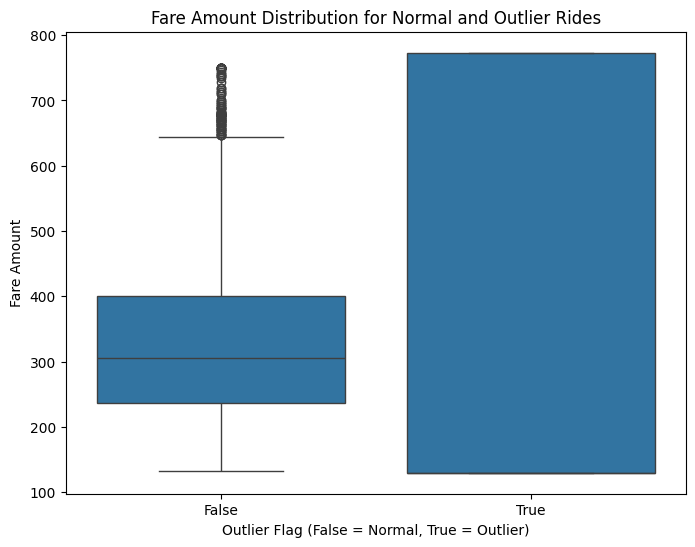

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x=df["Outlier_Flag"], y=df["fare_amount"])
plt.title("Fare Amount Distribution for Normal and Outlier Rides")
plt.xlabel("Outlier Flag (False = Normal, True = Outlier)")
plt.ylabel("Fare Amount")
plt.show()


In [ ]:
print(df.groupby("Outlier_Flag")[["fare_amount", "distance_km", "trip_duration"]].describe())


             fare_amount                                                      \
                   count        mean         std    min    25%    50%    75%   
Outlier_Flag                                                                   
False             4922.0  331.708249  126.540800  133.0  236.0  305.0  400.0   
True                67.0  378.656716  314.289268  130.0  130.0  130.0  773.0   

                    distance_km             ...                       \
                max       count       mean  ...        75%       max   
Outlier_Flag                                ...                        
False         749.0      4922.0  11.243701  ...  14.999754  25.44961   
True          773.0        67.0  12.047340  ...  18.708584  25.44961   

             trip_duration                                                     
                     count       mean       std   min   25%   50%   75%   max  
Outlier_Flag                                                                  

In [ ]:
import mysql.connector
import pandas as pd

# Load the dataset (Make sure to update the file name)
df = pd.read_csv("recalculated_fares_updated.csv")  # Replace with the actual file name

# Convert pickup_datetime to proper datetime format
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",      
    user="root",  
    password="90941122@Ibi",  
    database="uber_rides"  
)
cursor = conn.cursor()

# Define the INSERT query
insert_query = """
INSERT INTO uber_rides (
    fare_amount, pickup_datetime, pickup_location, pickup_latitude, pickup_longitude, 
    dropoff_location, dropoff_latitude, dropoff_longitude, trip_duration, outlier_flag, distance_km
) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
"""

# Insert data row by row
for _, row in df.iterrows():
    cursor.execute(insert_query, (
        row["fare_amount"], row["pickup_datetime"], row["Pickup Location"], row["Pickup Latitude"], row["Pickup Longitude"],
        row["Dropoff Location"], row["Dropoff Latitude"], row["Dropoff Longitude"], row["trip_duration"], 
        int(row["Outlier_Flag"]), row["distance_km"]
    ))

# Commit changes
conn.commit()

# Close connection
cursor.close()
conn.close()

print("✅ Data successfully inserted into MySQL!")


✅ Data successfully inserted into MySQL!


In [ ]:
pip install pymysql


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pymysql
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# MySQL connection details
db_user = "root"
db_password = quote_plus("90941122@Ibi")  # Encode special characters
db_host = "127.0.0.1"  # Use IP instead of 'localhost'
db_name = "uber_rides"

# Create the SQLAlchemy engine
engine = create_engine(f"mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}")

try:
    # Read data into a Pandas DataFrame
    df = pd.read_sql("SELECT * FROM uber_rides", engine)
    print(df.head())  # Display first 5 rows
except Exception as e:
    print("Error:", e)
finally:
    engine.dispose()  # Close connection



   id  fare_amount     pickup_datetime                  pickup_location  \
0   1        189.0 2024-02-09 11:39:00                       Anna Nagar   
1   2        249.0 2023-02-24 22:03:00  Chennai Central Railway Station   
2   3        507.0 2022-07-10 20:31:00                           Guindy   
3   4        390.0 2021-05-15 15:27:00                     Marina Beach   
4   5        306.0 2022-08-08 05:11:00                         Perambur   

   pickup_latitude  pickup_longitude dropoff_location  dropoff_latitude  \
0          13.0878           80.2105           Guindy           13.0078   
1          13.0827           80.2707     Marina Beach           13.0500   
2          13.0072           80.2209            Porur           13.0358   
3          13.0500           80.2824       Anna Nagar           13.0878   
4          13.1204           80.2446        Velachery           12.9766   

   dropoff_longitude  trip_duration  outlier_flag  distance_km  
0            80.2209             

In [ ]:
# Check for missing values
print(df.isnull().sum())


id                   0
fare_amount          0
pickup_datetime      0
pickup_location      0
pickup_latitude      0
pickup_longitude     0
dropoff_location     0
dropoff_latitude     0
dropoff_longitude    0
trip_duration        0
outlier_flag         0
distance_km          0
dtype: int64


In [ ]:
df = df.drop_duplicates()
print("Duplicates removed!")


Duplicates removed!


In [ ]:
print(df['outlier_flag'].value_counts())
outliers = df[df['outlier_flag'] == 1]
print(outliers)


outlier_flag
0    9844
1     134
Name: count, dtype: int64
        id  fare_amount     pickup_datetime  pickup_location  pickup_latitude  \
190    191        130.0 2023-12-09 19:16:00        Velachery          12.9766   
228    229        130.0 2022-09-12 06:52:00       Vadapalani          13.0500   
231    232        130.0 2024-10-15 01:36:00       Medavakkam          12.9228   
318    319        130.0 2022-09-11 20:42:00  Chennai Airport          12.9941   
395    396        133.0 2023-08-13 14:35:00          T Nagar          13.0418   
...    ...          ...                 ...              ...              ...   
9274  9275        130.0 2022-11-13 04:09:00       Pallavaram          12.9766   
9288  9289        130.0 2022-02-05 17:50:00            Porur          13.0352   
9431  9432        773.0 2023-05-06 07:50:00         Mylapore          13.0331   
9639  9640        130.0 2024-09-13 17:36:00         Tambaram          12.9242   
9728  9729        130.0 2022-09-10 04:21:00       

In [ ]:
print(df.dtypes)
df['fare_amount'] = df['fare_amount'].astype(float)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])


id                            int64
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_location              object
pickup_latitude             float64
pickup_longitude            float64
dropoff_location             object
dropoff_latitude            float64
dropoff_longitude           float64
trip_duration                 int64
outlier_flag                  int64
distance_km                 float64
dtype: object


In [ ]:
df = df[df['fare_amount'] > 0]
df = df[(df['trip_duration'] > 0) & (df['trip_duration'] < 200)]
df = df[df['distance_km'] > 0]
print("Data cleaned successfully!")


Data cleaned successfully!


In [ ]:
# Remove outliers
df = df[df['outlier_flag'] == 0]

# Reset index after removal
df.reset_index(drop=True, inplace=True)

# Verify removal
print("Outliers removed!")
print(df['outlier_flag'].value_counts())  # Should now contain only 0s
print(df.shape)  # Check updated dataset size


Outliers removed!
outlier_flag
0    9626
Name: count, dtype: int64
(9626, 12)


In [ ]:
import pymysql
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# MySQL connection details
db_user = "root"
db_password = quote_plus("90941122@Ibi")  # Encode special characters
db_host = "127.0.0.1"  # Use IP instead of 'localhost'
db_name = "uber_rides"

# Create the SQLAlchemy engine
engine = create_engine(f"mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}")

# Remove outliers
df = df[df['outlier_flag'] == 0]

# Reset index
df.reset_index(drop=True, inplace=True)

# Save cleaned data back to MySQL
try:
    df.to_sql(name="uber_rides_cleaned", con=engine, if_exists="replace", index=False)
    print("Cleaned data successfully saved to MySQL in the 'uber_rides_cleaned' table!")
except Exception as e:
    print("Error:", e)
finally:
    engine.dispose()  # Close connection


Cleaned data successfully saved to MySQL in the 'uber_rides_cleaned' table!


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# MySQL connection details
db_user = "root"
db_password = quote_plus("90941122@Ibi")
db_host = "127.0.0.1"
db_name = "uber_rides"

# Create SQLAlchemy engine
engine = create_engine(f"mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}")

# Load cleaned data
df = pd.read_sql("SELECT * FROM uber_rides_cleaned", engine)

# Close the connection
engine.dispose()


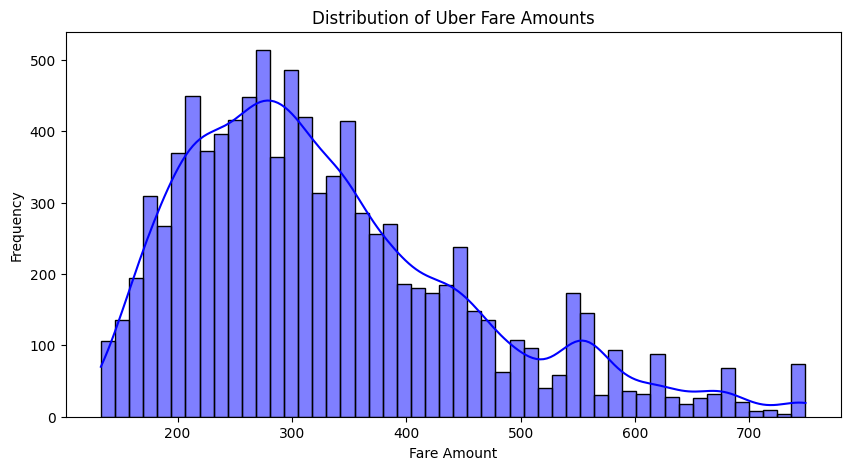

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['fare_amount'], bins=50, kde=True, color='blue')
plt.title("Distribution of Uber Fare Amounts")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.show()


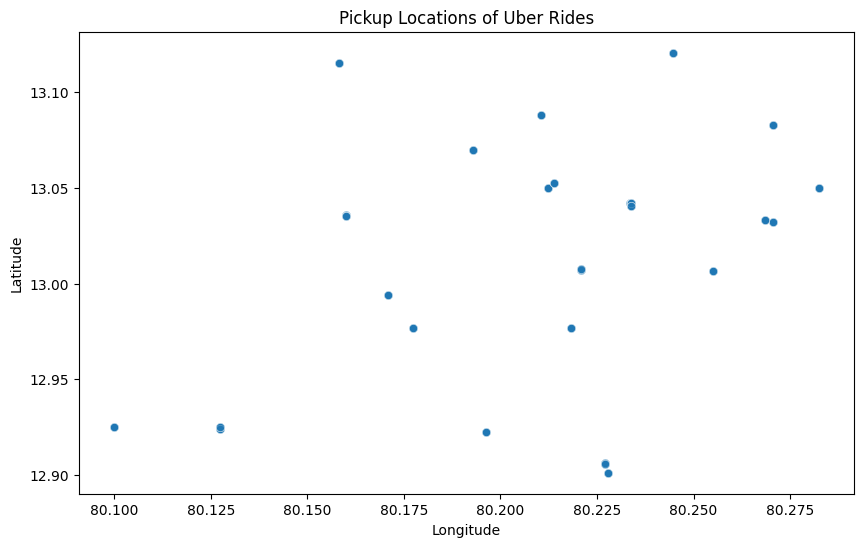

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['pickup_longitude'], y=df['pickup_latitude'], alpha=0.5)
plt.title("Pickup Locations of Uber Rides")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


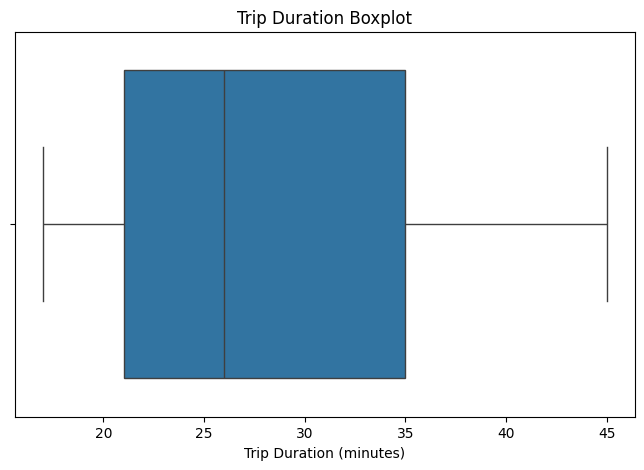

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['trip_duration'])
plt.title("Trip Duration Boxplot")
plt.xlabel("Trip Duration (minutes)")
plt.show()


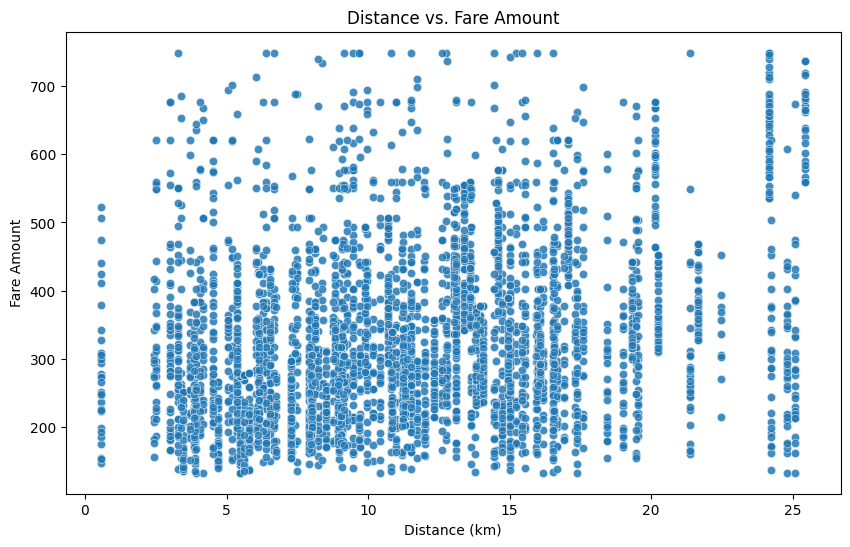

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['distance_km'], y=df['fare_amount'], alpha=0.6)
plt.title("Distance vs. Fare Amount")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount")
plt.show()


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R² Score: 0.027432767065602826
RMSE: 128.85133464685447


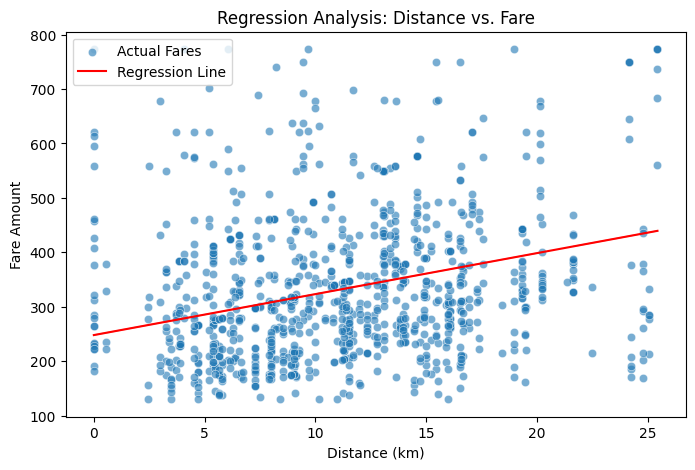

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (replace with your actual dataset file)
df = pd.read_csv("recalculated_fares_updated.csv")

# Drop any NaN values
df = df.dropna(subset=['distance_km', 'fare_amount'])

# Splitting data into training and testing sets
X = df[['distance_km']]  # Independent Variable
y = df['fare_amount']     # Dependent Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict fares
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

# Visualizing the Regression Line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['distance_km'], y=y_test, label="Actual Fares", alpha=0.6)
sns.lineplot(x=X_test['distance_km'], y=y_pred, color='red', label="Regression Line")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount")
plt.title("Regression Analysis: Distance vs. Fare")
plt.legend()
plt.show()


In [81]:
print(df.columns)


Index(['fare_amount', 'pickup_datetime', 'Pickup Location', 'Pickup Latitude',
       'Pickup Longitude', 'Dropoff Location', 'Dropoff Latitude',
       'Dropoff Longitude', 'trip_duration', 'Outlier_Flag', 'distance_km'],
      dtype='object')


In [82]:
X = df[['distance_km']]  # Use the correct column name
y = df['fare_amount']  # Target variable


In [83]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 3991 samples
Testing set size: 998 samples


In [84]:
from sklearn.linear_model import LinearRegression

# Initialize model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 99.27
Mean Squared Error (MSE): 16602.67
R² Score: 0.03


In [86]:
import pandas as pd

# Convert 'pickup_datetime' to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract features
df['hour_of_day'] = df['pickup_datetime'].dt.hour  # Extract hour
df['day_of_week'] = df['pickup_datetime'].dt.weekday  # Monday = 0, Sunday = 6

print(df[['pickup_datetime', 'hour_of_day', 'day_of_week']].head())


      pickup_datetime  hour_of_day  day_of_week
0 2024-02-09 11:39:00           11            4
1 2023-02-24 22:03:00           22            4
2 2022-07-10 20:31:00           20            6
3 2021-05-15 15:27:00           15            5
4 2022-08-08 05:11:00            5            0


In [87]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to Pickup and Dropoff Locations
df['pickup_location_encoded'] = le.fit_transform(df['Pickup Location'])
df['dropoff_location_encoded'] = le.fit_transform(df['Dropoff Location'])

print(df[['Pickup Location', 'pickup_location_encoded', 'Dropoff Location', 'dropoff_location_encoded']].head())


                   Pickup Location  pickup_location_encoded Dropoff Location  \
0                       Anna Nagar                        2           Guindy   
1  Chennai Central Railway Station                        4     Marina Beach   
2                           Guindy                        5            Porur   
3                     Marina Beach                        7       Anna Nagar   
4                         Perambur                       13        Velachery   

   dropoff_location_encoded  
0                         5  
1                         7  
2                        14  
3                         2  
4                        19  


In [88]:
# Select updated feature set
X = df[['distance_km', 'hour_of_day', 'day_of_week', 'pickup_location_encoded', 'dropoff_location_encoded']]
y = df['fare_amount']

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a new regression model
model.fit(X_train, y_train)

# Predict again
y_pred = model.predict(X_test)

# Evaluate the new model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Updated MAE: {mae:.2f}")
print(f"Updated MSE: {mse:.2f}")
print(f"Updated R² Score: {r2:.2f}")


Updated MAE: 98.70
Updated MSE: 16471.86
Updated R² Score: 0.04


In [89]:
import pandas as pd
import numpy as np

# Interaction Feature: Distance * Hour of Day
df['distance_time_interaction'] = df['distance_km'] * df['hour_of_day']

# Weekend Indicator (1 if Saturday/Sunday, else 0)
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)

# Peak Hours Indicator (Rush hours 7-10 AM, 5-8 PM)
df['is_peak_hour'] = df['hour_of_day'].apply(lambda x: 1 if 7 <= x <= 10 or 17 <= x <= 20 else 0)

# One-Hot Encoding for Day of the Week
df = pd.get_dummies(df, columns=['day_of_week'], drop_first=True)

# One-Hot Encoding for Hour of the Day (Optional: Can increase dimensions)
df = pd.get_dummies(df, columns=['hour_of_day'], drop_first=True)

# Display first few rows after feature engineering
print(df.head())


   fare_amount     pickup_datetime                  Pickup Location  \
0          189 2024-02-09 11:39:00                       Anna Nagar   
1          249 2023-02-24 22:03:00  Chennai Central Railway Station   
2          507 2022-07-10 20:31:00                           Guindy   
3          390 2021-05-15 15:27:00                     Marina Beach   
4          306 2022-08-08 05:11:00                         Perambur   

   Pickup Latitude  Pickup Longitude Dropoff Location  Dropoff Latitude  \
0          13.0878           80.2105           Guindy           13.0078   
1          13.0827           80.2707     Marina Beach           13.0500   
2          13.0072           80.2209            Porur           13.0358   
3          13.0500           80.2824       Anna Nagar           13.0878   
4          13.1204           80.2446        Velachery           12.9766   

   Dropoff Longitude  trip_duration  Outlier_Flag  ...  hour_of_day_14  \
0            80.2209             23         Fals

In [90]:
# Define the new feature set
feature_columns = [
    'distance_km', 'is_weekend', 'is_peak_hour', 'distance_time_interaction',
    'pickup_location_encoded', 'dropoff_location_encoded'
] + [col for col in df.columns if col.startswith('day_of_week_') or col.startswith('hour_of_day_')]

# Selecting the updated feature set
X = df[feature_columns]
y = df['fare_amount']

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a new regression model
model.fit(X_train, y_train)

# Predict again
y_pred = model.predict(X_test)

# Evaluate the new model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Final MAE: {mae:.2f}")
print(f"Final MSE: {mse:.2f}")
print(f"Final R² Score: {r2:.2f}")


Final MAE: 98.68
Final MSE: 16522.50
Final R² Score: 0.03


In [91]:
pip install xgboost scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [92]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{name} Results:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")



Random Forest Results:
MAE: 87.74
MSE: 14230.23
R² Score: 0.17

Gradient Boosting Results:
MAE: 83.39
MSE: 12607.01
R² Score: 0.26

XGBoost Results:
MAE: 84.22
MSE: 12900.72
R² Score: 0.24


In [93]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Initialize the model
gb = GradientBoostingRegressor(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the best model
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test)

# Evaluate the tuned model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Tuned Gradient Boosting MAE: {mae:.2f}")
print(f"Tuned Gradient Boosting MSE: {mse:.2f}")
print(f"Tuned Gradient Boosting R² Score: {r2:.2f}")


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Tuned Gradient Boosting MAE: 82.77
Tuned Gradient Boosting MSE: 12480.78
Tuned Gradient Boosting R² Score: 0.27


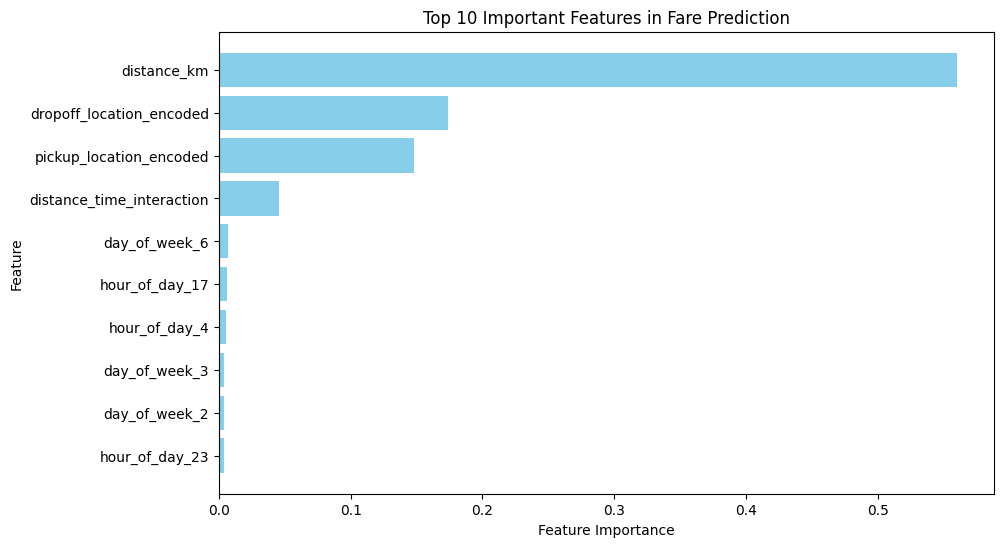

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
feature_importance = best_gb.feature_importances_
features = np.array(X_train.columns)

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx][:10], feature_importance[sorted_idx][:10], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Important Features in Fare Prediction")
plt.gca().invert_yaxis()
plt.show()


In [95]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [96]:
pip install --upgrade numpy


  Using cached numpy-2.2.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.3-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.3 which is incompatible.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.3 which is incompatible.


In [97]:
import catboost
import numpy as np
print(catboost.__version__)
print(np.__version__)


1.2.7
1.26.4


In [98]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.1, verbose=100)
cat_model.fit(X_train, y_train)

0:	learn: 128.7027720	total: 8ms	remaining: 3.99s


100:	learn: 99.7132861	total: 679ms	remaining: 2.68s
200:	learn: 91.2435497	total: 1.34s	remaining: 2s
300:	learn: 85.3427130	total: 2.01s	remaining: 1.33s
400:	learn: 80.3487446	total: 2.67s	remaining: 659ms
499:	learn: 76.4422275	total: 3.32s	remaining: 0us


In [99]:
y_pred = cat_model.predict(X_test)


In [100]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 12841.37
R² Score: 0.25


In [101]:
feature_importance = cat_model.get_feature_importance()
for feature, importance in zip(X_train.columns, feature_importance):
    print(f"{feature}: {importance:.2f}")


distance_km: 31.98
is_weekend: 0.85
is_peak_hour: 0.35
distance_time_interaction: 8.31
pickup_location_encoded: 20.48
dropoff_location_encoded: 22.43
day_of_week_1: 1.35
day_of_week_2: 1.33
day_of_week_3: 1.27
day_of_week_4: 0.71
day_of_week_5: 1.12
day_of_week_6: 1.19
hour_of_day_1: 0.25
hour_of_day_2: 0.25
hour_of_day_3: 0.46
hour_of_day_4: 0.40
hour_of_day_5: 0.36
hour_of_day_6: 0.17
hour_of_day_7: 0.56
hour_of_day_8: 0.28
hour_of_day_9: 0.23
hour_of_day_10: 0.33
hour_of_day_11: 0.33
hour_of_day_12: 0.35
hour_of_day_13: 0.35
hour_of_day_14: 0.50
hour_of_day_15: 0.53
hour_of_day_16: 0.45
hour_of_day_17: 0.65
hour_of_day_18: 0.43
hour_of_day_19: 0.47
hour_of_day_20: 0.19
hour_of_day_21: 0.40
hour_of_day_22: 0.27
hour_of_day_23: 0.42


In [102]:
import numpy as np
y_train = np.log1p(y_train)  # Apply log transformation
y_test = np.log1p(y_test)  # Transform test labels


In [103]:
print(X_train.columns)  # Print available columns
print(X_test.columns)

Index(['distance_km', 'is_weekend', 'is_peak_hour',
       'distance_time_interaction', 'pickup_location_encoded',
       'dropoff_location_encoded', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'hour_of_day_1', 'hour_of_day_2', 'hour_of_day_3', 'hour_of_day_4',
       'hour_of_day_5', 'hour_of_day_6', 'hour_of_day_7', 'hour_of_day_8',
       'hour_of_day_9', 'hour_of_day_10', 'hour_of_day_11', 'hour_of_day_12',
       'hour_of_day_13', 'hour_of_day_14', 'hour_of_day_15', 'hour_of_day_16',
       'hour_of_day_17', 'hour_of_day_18', 'hour_of_day_19', 'hour_of_day_20',
       'hour_of_day_21', 'hour_of_day_22', 'hour_of_day_23'],
      dtype='object')
Index(['distance_km', 'is_weekend', 'is_peak_hour',
       'distance_time_interaction', 'pickup_location_encoded',
       'dropoff_location_encoded', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'hour

In [104]:
rush_hour_columns = ['hour_of_day_7', 'hour_of_day_8', 'hour_of_day_17', 'hour_of_day_18']

In [105]:
X_train["rush_hour"] = X_train[rush_hour_columns].sum(axis=1)
X_test["rush_hour"] = X_test[rush_hour_columns].sum(axis=1)

In [106]:
print(X_train[['rush_hour']].value_counts())

rush_hour
0            3366
1             625
Name: count, dtype: int64


In [107]:
print(X_train.columns)  # Print available columns
print(X_test.columns)

Index(['distance_km', 'is_weekend', 'is_peak_hour',
       'distance_time_interaction', 'pickup_location_encoded',
       'dropoff_location_encoded', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'hour_of_day_1', 'hour_of_day_2', 'hour_of_day_3', 'hour_of_day_4',
       'hour_of_day_5', 'hour_of_day_6', 'hour_of_day_7', 'hour_of_day_8',
       'hour_of_day_9', 'hour_of_day_10', 'hour_of_day_11', 'hour_of_day_12',
       'hour_of_day_13', 'hour_of_day_14', 'hour_of_day_15', 'hour_of_day_16',
       'hour_of_day_17', 'hour_of_day_18', 'hour_of_day_19', 'hour_of_day_20',
       'hour_of_day_21', 'hour_of_day_22', 'hour_of_day_23', 'rush_hour'],
      dtype='object')
Index(['distance_km', 'is_weekend', 'is_peak_hour',
       'distance_time_interaction', 'pickup_location_encoded',
       'dropoff_location_encoded', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',

In [108]:
print(X_train.isnull().sum().sum(), X_test.isnull().sum().sum())  # Should be 0

0 0


In [109]:
print(X_train.dtypes)

distance_km                  float64
is_weekend                     int64
is_peak_hour                   int64
distance_time_interaction    float64
pickup_location_encoded        int32
dropoff_location_encoded       int32
day_of_week_1                   bool
day_of_week_2                   bool
day_of_week_3                   bool
day_of_week_4                   bool
day_of_week_5                   bool
day_of_week_6                   bool
hour_of_day_1                   bool
hour_of_day_2                   bool
hour_of_day_3                   bool
hour_of_day_4                   bool
hour_of_day_5                   bool
hour_of_day_6                   bool
hour_of_day_7                   bool
hour_of_day_8                   bool
hour_of_day_9                   bool
hour_of_day_10                  bool
hour_of_day_11                  bool
hour_of_day_12                  bool
hour_of_day_13                  bool
hour_of_day_14                  bool
hour_of_day_15                  bool
h

In [110]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3991, 36) (3991,) (998, 36) (998,)


In [111]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3991, 36) (3991,) (998, 36) (998,)


In [112]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize CatBoost Regressor
cat_model = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.1, verbose=100)

# Train the model
cat_model.fit(X_train, y_train)

# Make Predictions
y_pred = cat_model.predict(X_test)

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


0:	learn: 0.3739576	total: 4.84ms	remaining: 2.42s


100:	learn: 0.2959962	total: 639ms	remaining: 2.52s
200:	learn: 0.2705980	total: 1.29s	remaining: 1.93s
300:	learn: 0.2537467	total: 1.96s	remaining: 1.29s
400:	learn: 0.2398402	total: 2.61s	remaining: 645ms
499:	learn: 0.2276743	total: 3.24s	remaining: 0us
Mean Squared Error: 0.11
R² Score: 0.23


In [113]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(cat_model, X_train, y_train, cv=5, scoring="r2")
print(f"Cross-Validation R² Scores: {scores}")
print(f"Mean R² Score: {scores.mean():.2f}")

0:	learn: 0.3740426	total: 7ms	remaining: 3.49s
100:	learn: 0.2937760	total: 568ms	remaining: 2.24s
200:	learn: 0.2652857	total: 1.12s	remaining: 1.66s
300:	learn: 0.2455671	total: 1.66s	remaining: 1.1s
400:	learn: 0.2299198	total: 2.28s	remaining: 563ms
499:	learn: 0.2170537	total: 2.87s	remaining: 0us
0:	learn: 0.3751552	total: 7.79ms	remaining: 3.89s
100:	learn: 0.2942243	total: 648ms	remaining: 2.56s
200:	learn: 0.2654269	total: 1.24s	remaining: 1.84s
300:	learn: 0.2455537	total: 1.84s	remaining: 1.22s
400:	learn: 0.2297956	total: 2.44s	remaining: 603ms
499:	learn: 0.2161261	total: 3.05s	remaining: 0us
0:	learn: 0.3758030	total: 7.43ms	remaining: 3.71s
100:	learn: 0.2907489	total: 621ms	remaining: 2.45s
200:	learn: 0.2625287	total: 1.22s	remaining: 1.82s
300:	learn: 0.2417915	total: 1.85s	remaining: 1.22s
400:	learn: 0.2265883	total: 2.46s	remaining: 607ms
499:	learn: 0.2125600	total: 3.07s	remaining: 0us
0:	learn: 0.3721319	total: 7.39ms	remaining: 3.69s
100:	learn: 0.2912934	tota

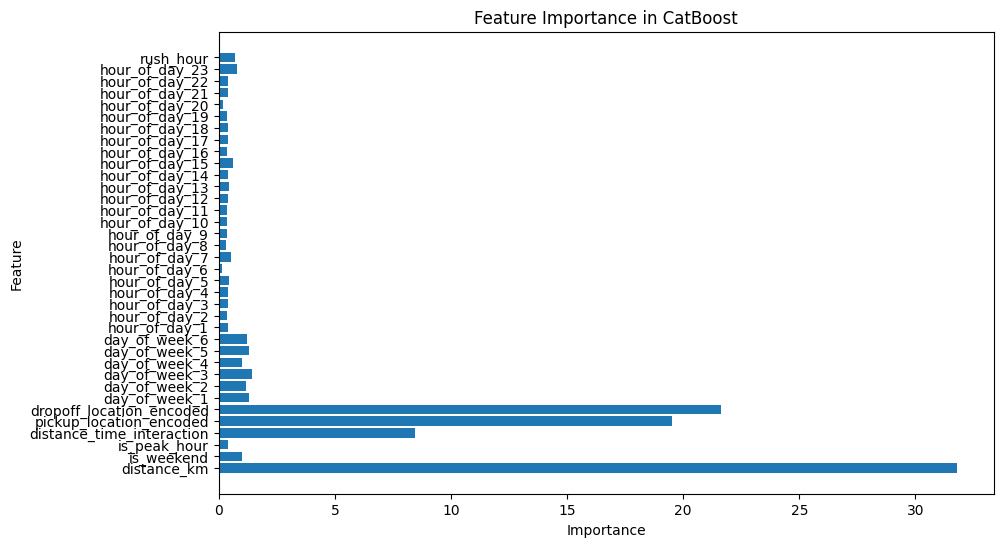

In [114]:
import matplotlib.pyplot as plt

feature_importances = cat_model.get_feature_importance()
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in CatBoost")
plt.show()


In [115]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(cat_model, X_train, y_train, cv=5, scoring="r2")
print(f"Cross-Validation R² Scores: {scores}")
print(f"Mean R² Score: {scores.mean():.2f}")


0:	learn: 0.3740426	total: 7.69ms	remaining: 3.83s
100:	learn: 0.2937760	total: 614ms	remaining: 2.42s
200:	learn: 0.2652857	total: 1.21s	remaining: 1.8s
300:	learn: 0.2455671	total: 1.77s	remaining: 1.17s
400:	learn: 0.2299198	total: 2.3s	remaining: 568ms
499:	learn: 0.2170537	total: 2.83s	remaining: 0us
0:	learn: 0.3751552	total: 6.19ms	remaining: 3.09s
100:	learn: 0.2942243	total: 596ms	remaining: 2.35s
200:	learn: 0.2654269	total: 1.22s	remaining: 1.82s
300:	learn: 0.2455537	total: 1.85s	remaining: 1.23s
400:	learn: 0.2297956	total: 2.47s	remaining: 610ms
499:	learn: 0.2161261	total: 3.09s	remaining: 0us
0:	learn: 0.3758030	total: 7.49ms	remaining: 3.74s
100:	learn: 0.2907489	total: 617ms	remaining: 2.44s
200:	learn: 0.2625287	total: 1.22s	remaining: 1.81s
300:	learn: 0.2417915	total: 1.82s	remaining: 1.2s
400:	learn: 0.2265883	total: 2.42s	remaining: 597ms
499:	learn: 0.2125600	total: 3.03s	remaining: 0us
0:	learn: 0.3721319	total: 6.85ms	remaining: 3.42s
100:	learn: 0.2912934	tot

In [116]:
# Evaluate the model on the test set
y_pred = cat_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# Calculate R² score for the test set
r2_test = r2_score(y_test, y_pred)
print(f"Test R² Score: {r2_test:.2f}")

# Calculate Mean Squared Error (MSE) as well
mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error (MSE): {mse:.2f}")


Test R² Score: 0.23
Test Mean Squared Error (MSE): 0.11


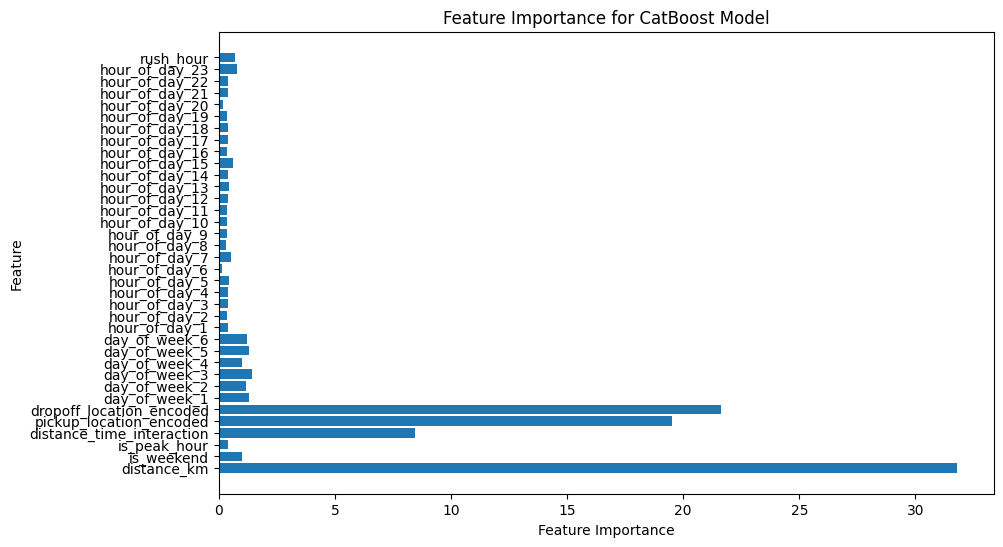

In [117]:
import matplotlib.pyplot as plt

# Get feature importance
feature_importances = cat_model.get_feature_importance()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for CatBoost Model')
plt.show()


In [118]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

# Define the model
catboost_model = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.1, loss_function='RMSE', verbose=0)

# Define the grid of hyperparameters to search
param_grid = {
    'iterations': [500, 1000],
    'depth': [6, 8, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'l2_leaf_reg': [3, 5, 7]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=3, scoring='r2', verbose=2)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.05; total time=   3.3s
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.05; total time=   3.3s
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.05; total time=   3.2s
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.1; total time=   2.8s
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.1; total time=   1.3s
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.1; total time=   1.4s
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.2; total time=   1.4s
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.2; total time=   1.5s
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.2; total time=   2.4s
[CV] END depth=6, iterations=500, l2_leaf_reg=5, learning_rate=0.05; total time=   3.2s
[CV] END depth=6, iterations=500, l2_leaf_reg=5, learning_rate=0

In [119]:
catboost_best_model = CatBoostRegressor(
    depth=6, 
    iterations=1000, 
    learning_rate=0.1, 
    l2_leaf_reg=3, 
    loss_function='RMSE'
)

catboost_best_model.fit(X_train, y_train)


0:	learn: 0.3739576	total: 5.79ms	remaining: 5.79s
1:	learn: 0.3693674	total: 10.7ms	remaining: 5.34s
2:	learn: 0.3649606	total: 15.7ms	remaining: 5.22s
3:	learn: 0.3620301	total: 19.7ms	remaining: 4.9s
4:	learn: 0.3583096	total: 24.2ms	remaining: 4.81s
5:	learn: 0.3540213	total: 28.2ms	remaining: 4.68s
6:	learn: 0.3513839	total: 33ms	remaining: 4.68s
7:	learn: 0.3497241	total: 37.6ms	remaining: 4.67s
8:	learn: 0.3468389	total: 42.3ms	remaining: 4.65s
9:	learn: 0.3443148	total: 46.7ms	remaining: 4.63s
10:	learn: 0.3430254	total: 50.7ms	remaining: 4.56s
11:	learn: 0.3413244	total: 55.5ms	remaining: 4.57s
12:	learn: 0.3402773	total: 58.7ms	remaining: 4.46s
13:	learn: 0.3389227	total: 62.2ms	remaining: 4.38s
14:	learn: 0.3372105	total: 65.7ms	remaining: 4.31s
15:	learn: 0.3355122	total: 68.8ms	remaining: 4.23s
16:	learn: 0.3339633	total: 72.2ms	remaining: 4.17s
17:	learn: 0.3330840	total: 74.5ms	remaining: 4.06s
18:	learn: 0.3318368	total: 77.1ms	remaining: 3.98s
19:	learn: 0.3307415	tota

In [120]:
test_r2 = catboost_best_model.score(X_test, y_test)
print(f"Test R² Score: {test_r2:.2f}")


Test R² Score: 0.20


In [121]:
import joblib

# Save the model
joblib.dump(cat_model, 'catboost_model.pkl')

# To load the model later
loaded_model = joblib.load('catboost_model.pkl')


In [122]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict on the test set
y_pred = cat_model.predict(X_test)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Absolute Error (MAE): 0.2560
Root Mean Squared Error (RMSE): 0.3296


In [123]:
import numpy as np

# Check for NaN values
print("NaN values in X_train:", np.isnan(X_train).sum())

# Check for infinite values
print("Infinite values in X_train:", np.isinf(X_train).sum())

NaN values in X_train: distance_km                  0
is_weekend                   0
is_peak_hour                 0
distance_time_interaction    0
pickup_location_encoded      0
dropoff_location_encoded     0
day_of_week_1                0
day_of_week_2                0
day_of_week_3                0
day_of_week_4                0
day_of_week_5                0
day_of_week_6                0
hour_of_day_1                0
hour_of_day_2                0
hour_of_day_3                0
hour_of_day_4                0
hour_of_day_5                0
hour_of_day_6                0
hour_of_day_7                0
hour_of_day_8                0
hour_of_day_9                0
hour_of_day_10               0
hour_of_day_11               0
hour_of_day_12               0
hour_of_day_13               0
hour_of_day_14               0
hour_of_day_15               0
hour_of_day_16               0
hour_of_day_17               0
hour_of_day_18               0
hour_of_day_19               0
hour_of_day_20  

In [125]:
print(X_train.shape)
print(y_train.shape)


(3991, 36)
(3991,)


In [126]:
y_train = y_train[:len(X_train)]

In [127]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)

(3991, 35)
(3991,)


In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train a baseline model (Linear Regression)
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_baseline = baseline_model.predict(X_test)

# Calculate MAE, RMSE, and R² for the baseline model
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
rmse_baseline = mean_squared_error(y_test, y_pred_baseline, squared=False)
r2_baseline = r2_score(y_test, y_pred_baseline)

print(f"Baseline Model - MAE: {mae_baseline:.4f}, RMSE: {rmse_baseline:.4f}, R²: {r2_baseline:.4f}")

Baseline Model - MAE: 98.6846, RMSE: 128.5399, R²: 0.0321


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [129]:
# Example: assuming categorical columns 'pickup_location_encoded' and 'dropoff_location_encoded'
cat_features = [X.columns.get_loc(col) for col in ['pickup_location_encoded', 'dropoff_location_encoded']]


In [130]:
from catboost import CatBoostRegressor

# Define the model with categorical features
catboost_model = CatBoostRegressor(
    loss_function='RMSE', 
    cat_features=cat_features  # Pass the categorical features
)

# Now, proceed with the hyperparameter tuning or fitting the model


In [131]:
param_grid = {
    'iterations': [500, 1000, 1500, 2000],
    'depth': [6, 8, 10, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'l2_leaf_reg': [3, 5, 7, 10]
}

In [ ]:
catboost_model = CatBoostRegressor(
    loss_function='RMSE', 
    cat_features=cat_features,
    iterations=1500, 
    depth=10, 
    learning_rate=0.1,
    l2_leaf_reg=5, 
    early_stopping_rounds=100,  # Stop if no improvement after 100 iterations
    verbose=0
)

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R²: {r2_rf}")


Random Forest MAE: 87.7351667581194
Random Forest RMSE: 119.29053977473178
Random Forest R²: 0.16640750052690423


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [135]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R²: {r2_xgb}")


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost MAE: 91.00623015745848
XGBoost RMSE: 121.17213357508405
XGBoost R²: 0.13990318775177002


In [137]:
# Save the trained model to a file
best_catboost_model.save_model('catboost_model.cbm')


NameError: name 'best_catboost_model' is not defined

In [138]:
from catboost import CatBoostRegressor

# Load the saved model from the file
model_path = r"C:\Users\SK79\Videos\overall\catboost_model.cbm"
loaded_model = CatBoostRegressor()
loaded_model.load_model(model_path)

print("Model loaded successfully!")


Model loaded successfully!


In [140]:
import pandas as pd
import numpy as np

# Define the number of test samples you want
num_samples = 10

# Generate synthetic data for numerical features
X_test = pd.DataFrame({
    'feature1': np.random.rand(num_samples),
    'feature2': np.random.randint(0, 100, num_samples),
    'feature3': np.random.choice(['A', 'B', 'C'], num_samples),  # Categorical feature
    'feature4': np.random.rand(num_samples),
    # Add more features as needed based on your training data
})

# Save to a CSV file (optional)
X_test.to_csv("synthetic_test_data.csv", index=False)

# Display the synthetic data
print(X_test)


   feature1  feature2 feature3  feature4
0  0.562127        96        B  0.507973
1  0.853042        46        A  0.705307
2  0.131963        61        A  0.204580
3  0.013485        13        B  0.649311
4  0.490372        80        A  0.366167
5  0.887480        16        A  0.582886
6  0.545256        53        B  0.500749
7  0.140503        26        B  0.961390
8  0.431542         8        C  0.720035
9  0.098125        24        A  0.432353


In [141]:
from sklearn.model_selection import train_test_split

# Assuming you have your training data in a DataFrame 'X' and labels in 'y'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save to CSV (optional)
X_test.to_csv("split_test_data.csv", index=False)

# Now you can use X_test in the model


In [142]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame called X (features) and y (target variable)

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the split data
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (3991, 35)
Test set size: (998, 35)


In [147]:
# Correctly define the categorical features (replace with actual column names)
cat_features = ['is_weekend', 'pickup_location_encoded', 'dropoff_location_encoded']  # Add your categorical features here

# Convert the specified categorical columns to strings
X_train[cat_features] = X_train[cat_features].astype(str)
X_test[cat_features] = X_test[cat_features].astype(str)

# Now let's try training the model again
catboost_model = CatBoostRegressor(
    loss_function='RMSE',
    cat_features=cat_features,
    verbose=100
)

# Train the model using the training set
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = catboost_model.predict(X_test)

# Evaluate the model using MAE, RMSE, and R²
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Learning rate set to 0.050951
0:	learn: 129.2321572	total: 65ms	remaining: 1m 4s
100:	learn: 102.9864617	total: 7.06s	remaining: 1m 2s
200:	learn: 99.1194146	total: 13.2s	remaining: 52.5s
300:	learn: 95.5195820	total: 22.4s	remaining: 52s
400:	learn: 92.6571535	total: 29.2s	remaining: 43.6s
500:	learn: 89.9626222	total: 36.2s	remaining: 36s
600:	learn: 87.3821632	total: 45.2s	remaining: 30s
700:	learn: 85.1126983	total: 54.9s	remaining: 23.4s
800:	learn: 83.0447198	total: 1m 5s	remaining: 16.2s
900:	learn: 81.1461015	total: 1m 15s	remaining: 8.35s
999:	learn: 79.3436897	total: 1m 25s	remaining: 0us
MAE: 82.72373898845305
RMSE: 112.47153250145753
R²: 0.2589849709331189


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [149]:
random_search = RandomizedSearchCV(
    estimator=catboost_model, 
    param_distributions=param_grid, 
    n_iter=10, 
    cv=3, 
    verbose=1, 
    n_jobs=1,  # Set this to 1 to avoid parallelization
    scoring='neg_mean_squared_error'
)

In [155]:
pip install optuna


Note: you may need to restart the kernel to use updated packages.


In [156]:
import optuna
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split Data for Training
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Objective Function for Optuna
def objective(trial):
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "iterations": trial.suggest_int("iterations", 500, 2000, step=500),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10, log=True),
        "border_count": trial.suggest_int("border_count", 32, 128),
        "verbose": 100,
    }
    
    # Train Model
    model = CatBoostRegressor(**params, cat_features=cat_features)
    model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=50, verbose=100)
    
    # Predictions & RMSE
    y_pred = model.predict(X_valid)
    rmse = mean_squared_error(y_valid, y_pred, squared=False)  # Root Mean Squared Error
    
    return rmse

# Run Optuna Optimization (Runs only 30 trials instead of 576!)
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)  # Run only 30 trials

# Best Hyperparameters
print("Best RMSE:", study.best_value)
print("Best Params:", study.best_params)

[I 2025-03-16 15:58:01,740] A new study created in memory with name: no-name-f09ecdc5-ea5e-4dff-b6cb-7f0056434f32


0:	learn: 130.0138894	test: 129.9585118	best: 129.9585118 (0)	total: 34.2ms	remaining: 1m 8s
100:	learn: 105.7024072	test: 112.5311688	best: 112.5311688 (100)	total: 3.36s	remaining: 1m 3s
200:	learn: 103.0602055	test: 111.0454164	best: 111.0454164 (200)	total: 6.27s	remaining: 56.1s
300:	learn: 101.2907496	test: 110.7980740	best: 110.7970801 (299)	total: 9.04s	remaining: 51s
400:	learn: 99.7930395	test: 110.7106766	best: 110.7088055 (393)	total: 12.8s	remaining: 51.1s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 15:58:16,726] Trial 0 finished with value: 110.70880551922696 and parameters: {'learning_rate': 0.02775821922250443, 'depth': 6, 'iterations': 2000, 'l2_leaf_reg': 6.809069031303811, 'border_count': 96}. Best is trial 0 with value: 110.70880551922696.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 110.7088055
bestIteration = 393

Shrink model to first 394 iterations.
0:	learn: 129.2087161	test: 129.5029399	best: 129.5029399 (0)	total: 48.4ms	remaining: 1m 36s
100:	learn: 102.8722743	test: 111.6634549	best: 111.6490516 (98)	total: 4.89s	remaining: 1m 32s
200:	learn: 98.6724580	test: 111.1411539	best: 111.1252109 (187)	total: 8.49s	remaining: 1m 16s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 15:58:26,895] Trial 1 finished with value: 111.12521088937753 and parameters: {'learning_rate': 0.04832973494396812, 'depth': 6, 'iterations': 2000, 'l2_leaf_reg': 1.743964388019664, 'border_count': 56}. Best is trial 0 with value: 110.70880551922696.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 111.1252109
bestIteration = 187

Shrink model to first 188 iterations.
0:	learn: 129.5568866	test: 129.6514868	best: 129.6514868 (0)	total: 27.5ms	remaining: 27.5s
100:	learn: 105.7611604	test: 112.3185274	best: 112.3185274 (100)	total: 2.29s	remaining: 20.4s
200:	learn: 103.9612141	test: 111.3104292	best: 111.3054503 (197)	total: 4.54s	remaining: 18.1s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 15:58:33,467] Trial 2 finished with value: 111.23220259621823 and parameters: {'learning_rate': 0.040603875830961575, 'depth': 4, 'iterations': 1000, 'l2_leaf_reg': 6.345035225602231, 'border_count': 59}. Best is trial 0 with value: 110.70880551922696.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 111.2322026
bestIteration = 236

Shrink model to first 237 iterations.
0:	learn: 127.6334028	test: 128.4730090	best: 128.4730090 (0)	total: 40.3ms	remaining: 1m
100:	learn: 96.8996082	test: 110.7364314	best: 110.7251335 (99)	total: 3.81s	remaining: 52.7s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 15:58:39,375] Trial 3 finished with value: 110.725133517793 and parameters: {'learning_rate': 0.09538382810286929, 'depth': 7, 'iterations': 1500, 'l2_leaf_reg': 3.036921885213296, 'border_count': 78}. Best is trial 0 with value: 110.70880551922696.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 110.7251335
bestIteration = 99

Shrink model to first 100 iterations.
0:	learn: 127.2958602	test: 128.0343390	best: 128.0343390 (0)	total: 26.6ms	remaining: 26.6s
100:	learn: 102.8641066	test: 111.4656465	best: 111.4479281 (88)	total: 2.1s	remaining: 18.7s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 15:58:43,436] Trial 4 finished with value: 111.31551627208357 and parameters: {'learning_rate': 0.10212644114772866, 'depth': 4, 'iterations': 1000, 'l2_leaf_reg': 1.5896451914796315, 'border_count': 121}. Best is trial 0 with value: 110.70880551922696.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 111.3155163
bestIteration = 137

Shrink model to first 138 iterations.
0:	learn: 124.8073077	test: 126.5459768	best: 126.5459768 (0)	total: 48.5ms	remaining: 1m 12s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 15:58:47,267] Trial 5 finished with value: 111.58990404154164 and parameters: {'learning_rate': 0.17561339134761383, 'depth': 8, 'iterations': 1500, 'l2_leaf_reg': 1.0420442966517025, 'border_count': 101}. Best is trial 0 with value: 110.70880551922696.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 111.589904
bestIteration = 37

Shrink model to first 38 iterations.
0:	learn: 130.1527524	test: 130.2124652	best: 130.2124652 (0)	total: 36.2ms	remaining: 54.3s
100:	learn: 107.2204712	test: 113.5390729	best: 113.5390729 (100)	total: 2.96s	remaining: 41s
200:	learn: 104.6197335	test: 111.7866921	best: 111.7864115 (198)	total: 5.55s	remaining: 35.9s
300:	learn: 103.4159264	test: 111.2602737	best: 111.2602737 (300)	total: 8.11s	remaining: 32.3s
400:	learn: 102.2920643	test: 111.0173000	best: 110.9981821 (376)	total: 10.7s	remaining: 29.3s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 15:58:58,894] Trial 6 finished with value: 110.99818209784495 and parameters: {'learning_rate': 0.024618198256030666, 'depth': 5, 'iterations': 1500, 'l2_leaf_reg': 9.517739936600844, 'border_count': 122}. Best is trial 0 with value: 110.70880551922696.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 110.9981821
bestIteration = 376

Shrink model to first 377 iterations.
0:	learn: 125.8574509	test: 127.2215651	best: 127.2215651 (0)	total: 55.2ms	remaining: 27.5s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 15:59:03,445] Trial 7 finished with value: 111.29287430004867 and parameters: {'learning_rate': 0.1610699338127808, 'depth': 10, 'iterations': 500, 'l2_leaf_reg': 5.605383325631633, 'border_count': 35}. Best is trial 0 with value: 110.70880551922696.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 111.2928743
bestIteration = 31

Shrink model to first 32 iterations.
0:	learn: 127.8708759	test: 128.6220648	best: 128.6220648 (0)	total: 50.7ms	remaining: 1m 15s
100:	learn: 95.1703012	test: 111.4537851	best: 111.4226846 (98)	total: 4.28s	remaining: 59.2s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 15:59:09,927] Trial 8 finished with value: 111.42268464401695 and parameters: {'learning_rate': 0.08682062072825525, 'depth': 8, 'iterations': 1500, 'l2_leaf_reg': 2.1525216049863545, 'border_count': 94}. Best is trial 0 with value: 110.70880551922696.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 111.4226846
bestIteration = 98

Shrink model to first 99 iterations.
0:	learn: 127.1410794	test: 128.1160709	best: 128.1160709 (0)	total: 42.3ms	remaining: 42.2s
100:	learn: 78.6245525	test: 112.3494648	best: 111.3831362 (70)	total: 5.19s	remaining: 46.2s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 15:59:16,468] Trial 9 finished with value: 111.38313623267845 and parameters: {'learning_rate': 0.10861931619888872, 'depth': 10, 'iterations': 1000, 'l2_leaf_reg': 1.7005333989511242, 'border_count': 79}. Best is trial 0 with value: 110.70880551922696.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 111.3831362
bestIteration = 70

Shrink model to first 71 iterations.
0:	learn: 130.5425469	test: 130.3808779	best: 130.3808779 (0)	total: 30.1ms	remaining: 1m
100:	learn: 110.3595993	test: 115.6873919	best: 115.6873919 (100)	total: 3.08s	remaining: 57.9s
200:	learn: 106.1244389	test: 112.6522805	best: 112.6522805 (200)	total: 6.32s	remaining: 56.6s
300:	learn: 104.4344586	test: 111.6189384	best: 111.6189384 (300)	total: 9.24s	remaining: 52.1s
400:	learn: 103.3519076	test: 111.2338605	best: 111.2338605 (400)	total: 12.2s	remaining: 48.8s
500:	learn: 102.4869053	test: 111.0275369	best: 111.0275369 (500)	total: 15.2s	remaining: 45.4s
600:	learn: 101.7307978	test: 110.8744799	best: 110.8727708 (599)	total: 18.2s	remaining: 42.3s
700:	learn: 100.9107243	test: 110.7972759	best: 110.7825479 (685)	total: 21.2s	remaining: 39.2s
800:	learn: 100.0736089	test: 110.7838637	best: 110.7658156 (757)	total: 24.2s	remaining: 36.2s
Stopped

c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 15:59:41,164] Trial 10 finished with value: 110.76581558323295 and parameters: {'learning_rate': 0.012235434921478732, 'depth': 6, 'iterations': 2000, 'l2_leaf_reg': 4.693085384035406, 'border_count': 101}. Best is trial 0 with value: 110.70880551922696.


0:	learn: 130.1312869	test: 130.1264961	best: 130.1264961 (0)	total: 63.4ms	remaining: 2m 6s
100:	learn: 105.6205551	test: 112.7509104	best: 112.7509104 (100)	total: 3.64s	remaining: 1m 8s
200:	learn: 101.8969384	test: 111.1251255	best: 111.1251255 (200)	total: 7.13s	remaining: 1m 3s
300:	learn: 99.6305068	test: 110.8475256	best: 110.8411676 (293)	total: 10.4s	remaining: 59s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 15:59:54,870] Trial 11 finished with value: 110.7700262158226 and parameters: {'learning_rate': 0.02275174908796081, 'depth': 7, 'iterations': 2000, 'l2_leaf_reg': 3.1854285200436423, 'border_count': 78}. Best is trial 0 with value: 110.70880551922696.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 110.7700262
bestIteration = 334

Shrink model to first 335 iterations.
0:	learn: 129.0950091	test: 129.4510681	best: 129.4510681 (0)	total: 35.4ms	remaining: 1m 10s
100:	learn: 101.4531167	test: 111.7295035	best: 111.7062989 (97)	total: 3.83s	remaining: 1m 12s
200:	learn: 96.0655600	test: 111.5040654	best: 111.3537584 (155)	total: 7.87s	remaining: 1m 10s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:00:03,156] Trial 12 finished with value: 111.35375836538252 and parameters: {'learning_rate': 0.053200204491252456, 'depth': 7, 'iterations': 2000, 'l2_leaf_reg': 3.5117942491038057, 'border_count': 66}. Best is trial 0 with value: 110.70880551922696.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 111.3537584
bestIteration = 155

Shrink model to first 156 iterations.
0:	learn: 130.0379791	test: 129.9633883	best: 129.9633883 (0)	total: 42.8ms	remaining: 1m 4s
100:	learn: 104.7506137	test: 112.0290608	best: 112.0290608 (100)	total: 4.76s	remaining: 1m 5s
200:	learn: 101.0676980	test: 110.9997788	best: 110.9997788 (200)	total: 8.58s	remaining: 55.4s
300:	learn: 98.7889750	test: 110.8507935	best: 110.8121948 (275)	total: 12.7s	remaining: 50.7s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:00:17,240] Trial 13 finished with value: 110.81219482496051 and parameters: {'learning_rate': 0.027021498101186585, 'depth': 8, 'iterations': 1500, 'l2_leaf_reg': 9.260481389658706, 'border_count': 91}. Best is trial 0 with value: 110.70880551922696.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 110.8121948
bestIteration = 275

Shrink model to first 276 iterations.
0:	learn: 130.5348039	test: 130.3591976	best: 130.3591976 (0)	total: 41.2ms	remaining: 1m 22s
100:	learn: 110.6999955	test: 116.1056695	best: 116.1056695 (100)	total: 3.32s	remaining: 1m 2s
200:	learn: 106.3750464	test: 113.1069425	best: 113.1069425 (200)	total: 6.73s	remaining: 1m
300:	learn: 104.4801064	test: 112.0449603	best: 112.0449603 (300)	total: 9.85s	remaining: 55.6s
400:	learn: 103.3273634	test: 111.5198598	best: 111.5198598 (400)	total: 12.6s	remaining: 50.4s
500:	learn: 102.3186538	test: 111.2080441	best: 111.2080441 (500)	total: 15.3s	remaining: 45.9s
600:	learn: 101.4014972	test: 111.0554446	best: 111.0554446 (600)	total: 18.1s	remaining: 42s
700:	learn: 100.6023722	test: 110.9304723	best: 110.9304723 (700)	total: 20.7s	remaining: 38.4s
800:	learn: 99.6659878	test: 110.8435611	best: 110.8418789 (798)	total: 23.5s	remaining: 35.2s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:00:43,529] Trial 14 finished with value: 110.82090968460695 and parameters: {'learning_rate': 0.011403616299065483, 'depth': 6, 'iterations': 2000, 'l2_leaf_reg': 2.4750923859522818, 'border_count': 110}. Best is trial 0 with value: 110.70880551922696.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 110.8209097
bestIteration = 838

Shrink model to first 839 iterations.
0:	learn: 128.6168317	test: 129.0745209	best: 129.0745209 (0)	total: 36.7ms	remaining: 54.9s
100:	learn: 95.8143938	test: 110.8884527	best: 110.7949706 (94)	total: 4.11s	remaining: 56.9s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:00:51,675] Trial 15 finished with value: 110.75059492975844 and parameters: {'learning_rate': 0.06784785815517008, 'depth': 9, 'iterations': 1500, 'l2_leaf_reg': 4.276963339557631, 'border_count': 71}. Best is trial 0 with value: 110.70880551922696.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 110.7505949
bestIteration = 140

Shrink model to first 141 iterations.
0:	learn: 129.7587561	test: 129.7825811	best: 129.7825811 (0)	total: 21.1ms	remaining: 10.5s
100:	learn: 105.5539520	test: 112.2347277	best: 112.2347277 (100)	total: 2.3s	remaining: 9.07s
200:	learn: 103.3610768	test: 111.2222499	best: 111.2157835 (199)	total: 4.63s	remaining: 6.89s
300:	learn: 101.7999867	test: 111.1222866	best: 111.0882650 (263)	total: 6.92s	remaining: 4.57s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:00:59,126] Trial 16 finished with value: 111.0882649672087 and parameters: {'learning_rate': 0.03448217899363761, 'depth': 5, 'iterations': 500, 'l2_leaf_reg': 6.8161217916816375, 'border_count': 48}. Best is trial 0 with value: 110.70880551922696.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 111.088265
bestIteration = 263

Shrink model to first 264 iterations.
0:	learn: 128.6432914	test: 128.9566108	best: 128.9566108 (0)	total: 19.9ms	remaining: 39.7s
100:	learn: 103.2868954	test: 111.2624541	best: 111.2624541 (100)	total: 2.59s	remaining: 48.7s
200:	learn: 99.5399599	test: 111.2574674	best: 110.9988095 (165)	total: 4.99s	remaining: 44.7s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:01:04,613] Trial 17 finished with value: 110.99880950126537 and parameters: {'learning_rate': 0.06551940157673501, 'depth': 5, 'iterations': 2000, 'l2_leaf_reg': 2.7031968513290567, 'border_count': 86}. Best is trial 0 with value: 110.70880551922696.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 110.9988095
bestIteration = 165

Shrink model to first 166 iterations.
0:	learn: 130.3785720	test: 130.2640590	best: 130.2640590 (0)	total: 42.4ms	remaining: 1m 3s
100:	learn: 107.7299715	test: 114.1346985	best: 114.1346985 (100)	total: 3.31s	remaining: 45.9s
200:	learn: 103.7870985	test: 111.6395461	best: 111.6389618 (199)	total: 6.59s	remaining: 42.6s
300:	learn: 101.7540493	test: 111.0676201	best: 111.0644237 (298)	total: 9.97s	remaining: 39.7s
400:	learn: 100.0991925	test: 110.8545909	best: 110.8545909 (400)	total: 13.9s	remaining: 38.1s
500:	learn: 98.5989679	test: 110.6816250	best: 110.6816250 (500)	total: 17.8s	remaining: 35.5s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:01:27,137] Trial 18 finished with value: 110.64594363430136 and parameters: {'learning_rate': 0.016850715309429505, 'depth': 7, 'iterations': 1500, 'l2_leaf_reg': 3.989860169537748, 'border_count': 111}. Best is trial 18 with value: 110.64594363430136.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 110.6459436
bestIteration = 543

Shrink model to first 544 iterations.
0:	learn: 130.3753529	test: 130.2921309	best: 130.2921309 (0)	total: 51.8ms	remaining: 51.7s
100:	learn: 108.1713731	test: 114.5082285	best: 114.5082285 (100)	total: 4.52s	remaining: 40.2s
200:	learn: 104.2805106	test: 111.8793553	best: 111.8793553 (200)	total: 7.86s	remaining: 31.3s
300:	learn: 102.4108131	test: 111.2243345	best: 111.2243345 (300)	total: 11.1s	remaining: 25.8s
400:	learn: 100.9984243	test: 110.9174202	best: 110.9123566 (396)	total: 14.6s	remaining: 21.8s
500:	learn: 99.6265162	test: 110.7922686	best: 110.7746386 (485)	total: 18s	remaining: 17.9s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:01:48,785] Trial 19 finished with value: 110.75252024197489 and parameters: {'learning_rate': 0.017024192227979466, 'depth': 7, 'iterations': 1000, 'l2_leaf_reg': 7.3977485857312, 'border_count': 109}. Best is trial 18 with value: 110.64594363430136.


600:	learn: 98.3488745	test: 110.7847849	best: 110.7525202 (550)	total: 21.4s	remaining: 14.2s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 110.7525202
bestIteration = 550

Shrink model to first 551 iterations.
0:	learn: 130.3593951	test: 130.2776422	best: 130.2776422 (0)	total: 39.6ms	remaining: 1m 19s
100:	learn: 106.8933654	test: 114.1280817	best: 114.1280817 (100)	total: 4.35s	remaining: 1m 21s
200:	learn: 101.6580142	test: 111.6560574	best: 111.6560574 (200)	total: 8.68s	remaining: 1m 17s
300:	learn: 98.3644122	test: 111.1304272	best: 111.1276263 (285)	total: 13.3s	remaining: 1m 14s
400:	learn: 95.8634402	test: 111.0380486	best: 111.0264631 (388)	total: 17.9s	remaining: 1m 11s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:02:11,574] Trial 20 finished with value: 110.9603315363896 and parameters: {'learning_rate': 0.016902707231340852, 'depth': 9, 'iterations': 2000, 'l2_leaf_reg': 4.8077518711751575, 'border_count': 126}. Best is trial 18 with value: 110.64594363430136.


500:	learn: 93.3826848	test: 110.9932756	best: 110.9603315 (452)	total: 22.5s	remaining: 1m 7s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 110.9603315
bestIteration = 452

Shrink model to first 453 iterations.
0:	learn: 130.4138520	test: 130.2885452	best: 130.2885452 (0)	total: 33ms	remaining: 49.5s
100:	learn: 108.8937053	test: 114.9097649	best: 114.9097649 (100)	total: 2.92s	remaining: 40.5s
200:	learn: 104.9903528	test: 112.2827199	best: 112.2827199 (200)	total: 5.92s	remaining: 38.2s
300:	learn: 103.4029844	test: 111.5360768	best: 111.5360768 (300)	total: 8.94s	remaining: 35.6s
400:	learn: 102.2247383	test: 111.1780115	best: 111.1780115 (400)	total: 12.2s	remaining: 33.3s
500:	learn: 101.1997948	test: 111.0428871	best: 111.0428871 (500)	total: 15.2s	remaining: 30.3s
600:	learn: 100.1093513	test: 110.9467192	best: 110.9467192 (600)	total: 18s	remaining: 26.9s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:02:32,272] Trial 21 finished with value: 110.90772846033116 and parameters: {'learning_rate': 0.015870570418424077, 'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 4.296921768245563, 'border_count': 108}. Best is trial 18 with value: 110.64594363430136.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 110.9077285
bestIteration = 631

Shrink model to first 632 iterations.
0:	learn: 129.8837159	test: 129.9666294	best: 129.9666294 (0)	total: 34.5ms	remaining: 51.8s
100:	learn: 104.3049371	test: 112.0043421	best: 112.0043421 (100)	total: 3.41s	remaining: 47.3s
200:	learn: 100.9891501	test: 111.1529005	best: 111.1427556 (199)	total: 6.55s	remaining: 42.3s
300:	learn: 98.1278837	test: 110.8115290	best: 110.7949321 (296)	total: 9.9s	remaining: 39.4s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:02:43,995] Trial 22 finished with value: 110.79493207901245 and parameters: {'learning_rate': 0.030303234011546214, 'depth': 7, 'iterations': 1500, 'l2_leaf_reg': 3.743052523230845, 'border_count': 87}. Best is trial 18 with value: 110.64594363430136.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 110.7949321
bestIteration = 296

Shrink model to first 297 iterations.
0:	learn: 130.2148320	test: 130.1639503	best: 130.1639503 (0)	total: 38.6ms	remaining: 57.9s
100:	learn: 105.5287282	test: 113.1673857	best: 113.1673857 (100)	total: 3.88s	remaining: 53.8s
200:	learn: 101.0559086	test: 111.4745784	best: 111.4745784 (200)	total: 7.78s	remaining: 50.3s
300:	learn: 98.1893616	test: 110.9742810	best: 110.9742810 (300)	total: 11.7s	remaining: 46.5s
400:	learn: 95.4994939	test: 110.8048521	best: 110.7867611 (377)	total: 16.1s	remaining: 44s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:03:02,843] Trial 23 finished with value: 110.78292731569753 and parameters: {'learning_rate': 0.020362436106206132, 'depth': 8, 'iterations': 1500, 'l2_leaf_reg': 2.8620271352661346, 'border_count': 99}. Best is trial 18 with value: 110.64594363430136.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 110.7829273
bestIteration = 403

Shrink model to first 404 iterations.
0:	learn: 129.7165513	test: 129.8442305	best: 129.8442305 (0)	total: 30.4ms	remaining: 30.3s
100:	learn: 104.7234889	test: 111.8299919	best: 111.8299919 (100)	total: 2.78s	remaining: 24.7s
200:	learn: 101.8692905	test: 110.7967262	best: 110.7897234 (199)	total: 5.49s	remaining: 21.8s
300:	learn: 99.5446916	test: 110.4349461	best: 110.4220728 (294)	total: 8.39s	remaining: 19.5s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:03:13,276] Trial 24 finished with value: 110.41525969963367 and parameters: {'learning_rate': 0.03726039778569209, 'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 5.423397305712581, 'border_count': 116}. Best is trial 24 with value: 110.41525969963367.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 110.4152597
bestIteration = 305

Shrink model to first 306 iterations.
0:	learn: 129.6426489	test: 129.9127946	best: 129.9127946 (0)	total: 33.2ms	remaining: 33.2s
100:	learn: 105.1580405	test: 112.3233564	best: 112.3233564 (100)	total: 2.6s	remaining: 23.1s
200:	learn: 102.9099038	test: 111.3100609	best: 111.3030416 (199)	total: 4.94s	remaining: 19.6s
300:	learn: 100.9031099	test: 111.1742627	best: 111.1328438 (291)	total: 7.29s	remaining: 16.9s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:03:23,345] Trial 25 finished with value: 111.0885896425569 and parameters: {'learning_rate': 0.040211017699766524, 'depth': 5, 'iterations': 1000, 'l2_leaf_reg': 5.504525089577422, 'border_count': 116}. Best is trial 24 with value: 110.41525969963367.


400:	learn: 99.1115219	test: 111.1291550	best: 111.0885896 (353)	total: 9.78s	remaining: 14.6s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 111.0885896
bestIteration = 353

Shrink model to first 354 iterations.
0:	learn: 129.9161133	test: 129.8725393	best: 129.8725393 (0)	total: 36.5ms	remaining: 18.2s
100:	learn: 105.5297907	test: 112.5554658	best: 112.5554658 (100)	total: 3.06s	remaining: 12.1s
200:	learn: 102.8566332	test: 111.4028323	best: 111.3966878 (199)	total: 5.86s	remaining: 8.71s
300:	learn: 100.9747179	test: 111.1055167	best: 111.0464639 (284)	total: 8.68s	remaining: 5.74s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:03:33,225] Trial 26 finished with value: 111.04646387820767 and parameters: {'learning_rate': 0.03237087621459319, 'depth': 6, 'iterations': 500, 'l2_leaf_reg': 8.53932341346478, 'border_count': 115}. Best is trial 24 with value: 110.41525969963367.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 111.0464639
bestIteration = 284

Shrink model to first 285 iterations.
0:	learn: 130.5050642	test: 130.3522154	best: 130.3522154 (0)	total: 31.3ms	remaining: 31.2s
100:	learn: 109.8784452	test: 115.7546178	best: 115.7546178 (100)	total: 2.8s	remaining: 24.9s
200:	learn: 105.9337836	test: 112.7973615	best: 112.7973615 (200)	total: 5.6s	remaining: 22.3s
300:	learn: 104.3414781	test: 111.8654191	best: 111.8654191 (300)	total: 8.54s	remaining: 19.8s
400:	learn: 103.2488952	test: 111.3244114	best: 111.3244114 (400)	total: 11.5s	remaining: 17.1s
500:	learn: 102.3695525	test: 111.1085680	best: 111.1075587 (498)	total: 14.2s	remaining: 14.1s
600:	learn: 101.6046581	test: 110.9496192	best: 110.9412529 (595)	total: 17s	remaining: 11.3s
700:	learn: 100.8288043	test: 110.9030578	best: 110.8817154 (664)	total: 19.8s	remaining: 8.47s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:03:53,741] Trial 27 finished with value: 110.88171535253832 and parameters: {'learning_rate': 0.013773807954960502, 'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 7.630139358136953, 'border_count': 128}. Best is trial 24 with value: 110.41525969963367.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 110.8817154
bestIteration = 664

Shrink model to first 665 iterations.
0:	learn: 130.6078617	test: 130.4118071	best: 130.4118071 (0)	total: 23.3ms	remaining: 23.3s
100:	learn: 112.4178305	test: 117.2776614	best: 117.2776614 (100)	total: 2.36s	remaining: 21s
200:	learn: 107.6735528	test: 113.7878968	best: 113.7878968 (200)	total: 4.74s	remaining: 18.8s
300:	learn: 106.0885909	test: 112.6416708	best: 112.6416708 (300)	total: 7.11s	remaining: 16.5s
400:	learn: 105.1236959	test: 112.0413334	best: 112.0413334 (400)	total: 9.62s	remaining: 14.4s
500:	learn: 104.4082165	test: 111.6821802	best: 111.6821802 (500)	total: 12s	remaining: 12s
600:	learn: 103.8564721	test: 111.4505407	best: 111.4505407 (600)	total: 14.3s	remaining: 9.51s
700:	learn: 103.3789163	test: 111.3096524	best: 111.3096524 (700)	total: 16.6s	remaining: 7.09s
800:	learn: 102.9057120	test: 111.1994970	best: 111.1991954 (795)	total: 19.2s	remaining: 4.77s
900:	lea

c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:04:18,352] Trial 28 finished with value: 111.03108131099876 and parameters: {'learning_rate': 0.010162093368727448, 'depth': 5, 'iterations': 1000, 'l2_leaf_reg': 5.851400237865938, 'border_count': 104}. Best is trial 24 with value: 110.41525969963367.


999:	learn: 101.8687455	test: 111.0339648	best: 111.0310813 (967)	total: 24.3s	remaining: 0us

bestTest = 111.0310813
bestIteration = 967

Shrink model to first 968 iterations.
0:	learn: 129.3214348	test: 129.4268565	best: 129.4268565 (0)	total: 26ms	remaining: 13s
100:	learn: 103.4417434	test: 111.2934638	best: 111.2934638 (100)	total: 2.97s	remaining: 11.7s
200:	learn: 100.1576566	test: 110.6812161	best: 110.6548657 (185)	total: 6.05s	remaining: 9.01s
300:	learn: 96.9246914	test: 110.6755668	best: 110.5364330 (272)	total: 9.12s	remaining: 6.03s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:04:28,329] Trial 29 finished with value: 110.53643299165604 and parameters: {'learning_rate': 0.04884972440181747, 'depth': 6, 'iterations': 500, 'l2_leaf_reg': 5.096610158896981, 'border_count': 115}. Best is trial 24 with value: 110.41525969963367.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 110.536433
bestIteration = 272

Shrink model to first 273 iterations.
Best RMSE: 110.41525969963367
Best Params: {'learning_rate': 0.03726039778569209, 'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 5.423397305712581, 'border_count': 116}


In [159]:
import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Optuna objective function
def objective(trial):
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "depth": trial.suggest_int("depth", 4, 10),
        "iterations": trial.suggest_int("iterations", 1000, 3000, step=500),  # Updated range
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 5, 50, log=True),  # Updated range
        "border_count": trial.suggest_int("border_count", 32, 128),
        "task_type": "GPU"  # Use GPU if available for faster training
    }
    
    # Initialize CatBoost model with current parameters
    model = CatBoostRegressor(**params, cat_features=cat_features, verbose=100)
    
    # Train the model
    model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=50, verbose=100)
    
    # Predict and calculate RMSE
    y_pred = model.predict(X_valid)
    rmse = mean_squared_error(y_valid, y_pred, squared=False)
    
    return rmse  # Optuna will minimize this score

# Run Optuna optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

# Print best parameters
print(f"Best RMSE: {study.best_value}")
print(f"Best Parameters: {study.best_params}")

[I 2025-03-16 16:05:52,535] A new study created in memory with name: no-name-a2d3ade7-0113-499a-99cf-20998d1bf88d


0:	learn: 126.3291013	test: 127.2313311	best: 127.2313311 (0)	total: 98.6ms	remaining: 4m 6s
100:	learn: 98.5918495	test: 111.3222812	best: 111.2883921 (98)	total: 2.9s	remaining: 1m 8s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:05:57,919] Trial 0 finished with value: 111.18802159687264 and parameters: {'learning_rate': 0.1201953305486134, 'depth': 8, 'iterations': 2500, 'l2_leaf_reg': 7.869688893662731, 'border_count': 68}. Best is trial 0 with value: 111.18802159687264.


bestTest = 111.1880279
bestIteration = 136
Shrink model to first 137 iterations.
0:	learn: 128.3813303	test: 128.7221885	best: 128.7221885 (0)	total: 38.2ms	remaining: 1m 54s
100:	learn: 100.3168221	test: 111.3058668	best: 111.3058668 (100)	total: 3.72s	remaining: 1m 46s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:06:04,522] Trial 1 finished with value: 111.15331152342216 and parameters: {'learning_rate': 0.06818391392906484, 'depth': 9, 'iterations': 3000, 'l2_leaf_reg': 7.884040953863941, 'border_count': 33}. Best is trial 1 with value: 111.15331152342216.


bestTest = 111.1533181
bestIteration = 127
Shrink model to first 128 iterations.
0:	learn: 130.3625536	test: 130.2281873	best: 130.2281873 (0)	total: 21.4ms	remaining: 1m 4s
100:	learn: 108.4006091	test: 114.8282066	best: 114.8282066 (100)	total: 2.5s	remaining: 1m 11s
200:	learn: 105.1972459	test: 112.7492474	best: 112.7492474 (200)	total: 5.15s	remaining: 1m 11s
300:	learn: 104.0434926	test: 112.1099205	best: 112.1099205 (300)	total: 7.46s	remaining: 1m 6s
400:	learn: 103.2693966	test: 111.8113391	best: 111.8113391 (400)	total: 9.39s	remaining: 1m
500:	learn: 102.7225185	test: 111.5478006	best: 111.5472706 (499)	total: 11.3s	remaining: 56.5s
600:	learn: 102.2792959	test: 111.4229067	best: 111.4189722 (597)	total: 13.4s	remaining: 53.6s
700:	learn: 101.9523130	test: 111.3015007	best: 111.3015007 (700)	total: 15.4s	remaining: 50.4s
800:	learn: 101.6196869	test: 111.2334291	best: 111.2334291 (800)	total: 17.2s	remaining: 47.1s
900:	learn: 101.3421137	test: 111.2067484	best: 111.2019593 

c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:06:25,257] Trial 2 finished with value: 111.19414522876654 and parameters: {'learning_rate': 0.01591509117054178, 'depth': 5, 'iterations': 3000, 'l2_leaf_reg': 10.99141596670477, 'border_count': 52}. Best is trial 1 with value: 111.15331152342216.


bestTest = 111.1941378
bestIteration = 941
Shrink model to first 942 iterations.
0:	learn: 127.2278609	test: 127.8161803	best: 127.8161803 (0)	total: 29.7ms	remaining: 1m 14s
100:	learn: 100.7022150	test: 111.3442548	best: 111.2575683 (90)	total: 2.73s	remaining: 1m 4s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:06:29,350] Trial 3 finished with value: 111.25756376538622 and parameters: {'learning_rate': 0.1158206375926397, 'depth': 7, 'iterations': 2500, 'l2_leaf_reg': 18.43837640788321, 'border_count': 58}. Best is trial 1 with value: 111.15331152342216.


bestTest = 111.2575683
bestIteration = 90
Shrink model to first 91 iterations.
0:	learn: 127.9785437	test: 128.4641821	best: 128.4641821 (0)	total: 87.6ms	remaining: 1m 27s
100:	learn: 99.9047554	test: 111.3345308	best: 111.3268671 (98)	total: 6.12s	remaining: 54.4s
200:	learn: 96.4172944	test: 111.3104579	best: 111.1136377 (159)	total: 12.1s	remaining: 47.9s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:06:42,272] Trial 4 finished with value: 111.1136341215494 and parameters: {'learning_rate': 0.10863472835131928, 'depth': 10, 'iterations': 1000, 'l2_leaf_reg': 36.897188393158046, 'border_count': 85}. Best is trial 4 with value: 111.1136341215494.


bestTest = 111.1136377
bestIteration = 159
Shrink model to first 160 iterations.
0:	learn: 127.7504889	test: 128.2940869	best: 128.2940869 (0)	total: 76.3ms	remaining: 1m 16s
100:	learn: 100.0902174	test: 111.2029415	best: 111.2029415 (100)	total: 6.29s	remaining: 55.9s
200:	learn: 96.0490719	test: 110.9790372	best: 110.9337261 (164)	total: 12.3s	remaining: 48.9s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:06:55,692] Trial 5 finished with value: 110.93372338618829 and parameters: {'learning_rate': 0.09760577231670864, 'depth': 10, 'iterations': 1000, 'l2_leaf_reg': 18.262756663606186, 'border_count': 109}. Best is trial 5 with value: 110.93372338618829.


bestTest = 110.9337261
bestIteration = 164
Shrink model to first 165 iterations.
0:	learn: 124.6627241	test: 126.1716433	best: 126.1716433 (0)	total: 21.5ms	remaining: 21.5s
100:	learn: 100.4398794	test: 111.0015978	best: 110.8390752 (93)	total: 1.86s	remaining: 16.5s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:06:58,533] Trial 6 finished with value: 110.83907996740285 and parameters: {'learning_rate': 0.19326070219539038, 'depth': 5, 'iterations': 1000, 'l2_leaf_reg': 9.914381879308435, 'border_count': 106}. Best is trial 6 with value: 110.83907996740285.


bestTest = 110.8390752
bestIteration = 93
Shrink model to first 94 iterations.
0:	learn: 128.6904884	test: 128.9929159	best: 128.9929159 (0)	total: 55.9ms	remaining: 2m 47s
100:	learn: 100.9258270	test: 111.3661431	best: 111.3661431 (100)	total: 4.13s	remaining: 1m 58s
200:	learn: 98.7245547	test: 111.2140239	best: 111.2002202 (198)	total: 7.17s	remaining: 1m 39s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:07:08,033] Trial 7 finished with value: 111.18401818626377 and parameters: {'learning_rate': 0.05489639904936699, 'depth': 9, 'iterations': 3000, 'l2_leaf_reg': 6.108047488883481, 'border_count': 41}. Best is trial 6 with value: 110.83907996740285.


bestTest = 111.1840266
bestIteration = 222
Shrink model to first 223 iterations.
0:	learn: 125.3221796	test: 126.3945060	best: 126.3945060 (0)	total: 28.8ms	remaining: 57.5s
100:	learn: 99.5006626	test: 110.9482538	best: 110.8663642 (99)	total: 2.59s	remaining: 48.6s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:07:12,023] Trial 8 finished with value: 110.86635984780075 and parameters: {'learning_rate': 0.18088030776201952, 'depth': 7, 'iterations': 2000, 'l2_leaf_reg': 20.008871274279187, 'border_count': 117}. Best is trial 6 with value: 110.83907996740285.


bestTest = 110.8663642
bestIteration = 99
Shrink model to first 100 iterations.
0:	learn: 130.5664777	test: 130.3799519	best: 130.3799519 (0)	total: 14.4ms	remaining: 43.1s
100:	learn: 110.5750351	test: 116.3191010	best: 116.3191010 (100)	total: 1.44s	remaining: 41.3s
200:	learn: 106.8296367	test: 113.7074702	best: 113.7074702 (200)	total: 3.02s	remaining: 42s
300:	learn: 105.2452863	test: 112.5471934	best: 112.5471934 (300)	total: 4.51s	remaining: 40.4s
400:	learn: 104.5801859	test: 112.2243896	best: 112.2240771 (398)	total: 6.43s	remaining: 41.7s
500:	learn: 104.0366818	test: 111.9391028	best: 111.9391028 (500)	total: 8.19s	remaining: 40.9s
600:	learn: 103.6344451	test: 111.7071303	best: 111.7071303 (600)	total: 9.98s	remaining: 39.8s
700:	learn: 103.2797273	test: 111.5197889	best: 111.5194340 (699)	total: 11.9s	remaining: 39s
800:	learn: 102.9761827	test: 111.3331763	best: 111.3240634 (788)	total: 13.9s	remaining: 38.1s
900:	learn: 102.7237528	test: 111.2234927	best: 111.2234927 (90

c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:07:35,239] Trial 9 finished with value: 111.00976694442659 and parameters: {'learning_rate': 0.013372771448241227, 'depth': 4, 'iterations': 3000, 'l2_leaf_reg': 9.731048645889281, 'border_count': 42}. Best is trial 6 with value: 110.83907996740285.


bestTest = 111.0097398
bestIteration = 1244
Shrink model to first 1245 iterations.
0:	learn: 126.9062911	test: 127.5342934	best: 127.5342934 (0)	total: 25.5ms	remaining: 38.3s
100:	learn: 101.9730731	test: 110.4934505	best: 110.4934505 (100)	total: 2.16s	remaining: 29.9s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:07:39,589] Trial 10 finished with value: 110.1349189718416 and parameters: {'learning_rate': 0.19552820426882492, 'depth': 5, 'iterations': 1500, 'l2_leaf_reg': 49.867562689997435, 'border_count': 94}. Best is trial 10 with value: 110.1349189718416.


bestTest = 110.1349191
bestIteration = 132
Shrink model to first 133 iterations.
0:	learn: 126.1315648	test: 127.2443565	best: 127.2443565 (0)	total: 25.6ms	remaining: 38.4s
100:	learn: 101.8296316	test: 110.9500781	best: 110.9278142 (99)	total: 2.06s	remaining: 28.5s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:07:43,285] Trial 11 finished with value: 110.83363046882722 and parameters: {'learning_rate': 0.195873763633153, 'depth': 5, 'iterations': 1500, 'l2_leaf_reg': 44.49233671375736, 'border_count': 93}. Best is trial 10 with value: 110.1349189718416.


bestTest = 110.8336239
bestIteration = 113
Shrink model to first 114 iterations.
0:	learn: 127.5871568	test: 128.0560686	best: 128.0560686 (0)	total: 22.2ms	remaining: 33.3s
100:	learn: 102.1072095	test: 111.4743201	best: 111.4743201 (100)	total: 2.17s	remaining: 30.1s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:07:47,578] Trial 12 finished with value: 111.1026425725086 and parameters: {'learning_rate': 0.16032632251923185, 'depth': 5, 'iterations': 1500, 'l2_leaf_reg': 49.43014187724652, 'border_count': 90}. Best is trial 10 with value: 110.1349189718416.


bestTest = 111.1026399
bestIteration = 132
Shrink model to first 133 iterations.
0:	learn: 126.5517306	test: 127.5471385	best: 127.5471385 (0)	total: 32.5ms	remaining: 48.8s
100:	learn: 101.2429049	test: 110.9843550	best: 110.9810867 (99)	total: 2.58s	remaining: 35.7s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:07:51,883] Trial 13 finished with value: 110.81775413412976 and parameters: {'learning_rate': 0.16223597241499269, 'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 30.69003697130738, 'border_count': 128}. Best is trial 10 with value: 110.1349189718416.


bestTest = 110.817752
bestIteration = 106
Shrink model to first 107 iterations.
0:	learn: 126.7429544	test: 127.6809651	best: 127.6809651 (0)	total: 26.1ms	remaining: 39.1s
100:	learn: 101.3133896	test: 111.3116551	best: 111.2746066 (94)	total: 2.56s	remaining: 35.5s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:07:56,613] Trial 14 finished with value: 110.86054152224565 and parameters: {'learning_rate': 0.15438652392012014, 'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 30.356872062607305, 'border_count': 128}. Best is trial 10 with value: 110.1349189718416.


bestTest = 110.8605436
bestIteration = 130
Shrink model to first 131 iterations.
0:	learn: 126.7352164	test: 127.6733683	best: 127.6733683 (0)	total: 23.2ms	remaining: 46.3s
100:	learn: 101.4345710	test: 111.0167259	best: 110.9588606 (96)	total: 2.41s	remaining: 45.3s
200:	learn: 99.0034433	test: 110.5438596	best: 110.5029765 (196)	total: 4.72s	remaining: 42.2s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:08:03,665] Trial 15 finished with value: 110.49912322070607 and parameters: {'learning_rate': 0.14979524159873575, 'depth': 6, 'iterations': 2000, 'l2_leaf_reg': 26.67913346686318, 'border_count': 128}. Best is trial 10 with value: 110.1349189718416.


bestTest = 110.4991136
bestIteration = 240
Shrink model to first 241 iterations.
0:	learn: 128.0851164	test: 128.6766270	best: 128.6766270 (0)	total: 22.4ms	remaining: 44.7s
100:	learn: 102.6129680	test: 111.4423069	best: 111.4423069 (100)	total: 1.75s	remaining: 32.9s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:08:07,011] Trial 16 finished with value: 111.17088606198665 and parameters: {'learning_rate': 0.1414251835564806, 'depth': 4, 'iterations': 2000, 'l2_leaf_reg': 24.711736879741327, 'border_count': 71}. Best is trial 10 with value: 110.1349189718416.


bestTest = 111.1708862
bestIteration = 126
Shrink model to first 127 iterations.
0:	learn: 126.3590236	test: 127.1765535	best: 127.1765535 (0)	total: 23.4ms	remaining: 46.9s
100:	learn: 100.8602140	test: 110.8483817	best: 110.8483817 (100)	total: 2.37s	remaining: 44.5s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:08:10,761] Trial 17 finished with value: 110.84838016146658 and parameters: {'learning_rate': 0.13466308142843525, 'depth': 6, 'iterations': 2000, 'l2_leaf_reg': 13.391774831213386, 'border_count': 100}. Best is trial 10 with value: 110.1349189718416.


bestTest = 110.8483817
bestIteration = 100
Shrink model to first 101 iterations.
0:	learn: 126.2077728	test: 127.0407600	best: 127.0407600 (0)	total: 29.1ms	remaining: 1m 12s
100:	learn: 99.7268482	test: 110.6658749	best: 110.6376807 (89)	total: 2.96s	remaining: 1m 10s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:08:15,074] Trial 18 finished with value: 110.63768105162373 and parameters: {'learning_rate': 0.17523988528394, 'depth': 7, 'iterations': 2500, 'l2_leaf_reg': 37.32123866408251, 'border_count': 116}. Best is trial 10 with value: 110.1349189718416.


bestTest = 110.6376807
bestIteration = 89
Shrink model to first 90 iterations.
0:	learn: 129.1895870	test: 129.4366629	best: 129.4366629 (0)	total: 21.1ms	remaining: 31.6s
100:	learn: 103.7134228	test: 111.9234368	best: 111.9234368 (100)	total: 1.88s	remaining: 26s
200:	learn: 102.2562603	test: 111.2733549	best: 111.2733549 (200)	total: 3.67s	remaining: 23.8s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:08:20,900] Trial 19 finished with value: 111.20456077747777 and parameters: {'learning_rate': 0.08538436936353458, 'depth': 4, 'iterations': 1500, 'l2_leaf_reg': 25.5974027743491, 'border_count': 76}. Best is trial 10 with value: 110.1349189718416.


bestTest = 111.2045588
bestIteration = 248
Shrink model to first 249 iterations.
0:	learn: 126.4604347	test: 127.4676233	best: 127.4676233 (0)	total: 24.7ms	remaining: 49.4s
100:	learn: 100.7974816	test: 111.5518248	best: 111.5131219 (96)	total: 2.42s	remaining: 45.4s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:08:25,497] Trial 20 finished with value: 111.3631731233242 and parameters: {'learning_rate': 0.17720848225892488, 'depth': 6, 'iterations': 2000, 'l2_leaf_reg': 38.27574019499183, 'border_count': 94}. Best is trial 10 with value: 110.1349189718416.


bestTest = 111.3631785
bestIteration = 128
Shrink model to first 129 iterations.
0:	learn: 126.0590277	test: 126.9599845	best: 126.9599845 (0)	total: 37.3ms	remaining: 1m 33s
100:	learn: 99.8742181	test: 110.4256385	best: 110.3904257 (98)	total: 3.89s	remaining: 1m 32s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:08:31,576] Trial 21 finished with value: 110.39042569194498 and parameters: {'learning_rate': 0.17637389213306176, 'depth': 8, 'iterations': 2500, 'l2_leaf_reg': 37.8532686613335, 'border_count': 117}. Best is trial 10 with value: 110.1349189718416.


bestTest = 110.3904257
bestIteration = 98
Shrink model to first 99 iterations.
0:	learn: 125.1191685	test: 126.2678547	best: 126.2678547 (0)	total: 41.3ms	remaining: 1m 43s
100:	learn: 98.8228384	test: 111.2484176	best: 110.9723467 (76)	total: 3.91s	remaining: 1m 32s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:08:36,739] Trial 22 finished with value: 110.97234421456041 and parameters: {'learning_rate': 0.19707307638367352, 'depth': 8, 'iterations': 2500, 'l2_leaf_reg': 28.492921997589125, 'border_count': 117}. Best is trial 10 with value: 110.1349189718416.


bestTest = 110.9723467
bestIteration = 76
Shrink model to first 77 iterations.
0:	learn: 126.8871932	test: 127.5799682	best: 127.5799682 (0)	total: 39.1ms	remaining: 1m 18s
100:	learn: 100.2119628	test: 110.9805089	best: 110.9703512 (99)	total: 3.99s	remaining: 1m 15s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:08:44,202] Trial 23 finished with value: 110.67326509361841 and parameters: {'learning_rate': 0.14882797498016864, 'depth': 8, 'iterations': 2000, 'l2_leaf_reg': 41.20876098499493, 'border_count': 121}. Best is trial 10 with value: 110.1349189718416.


bestTest = 110.6732721
bestIteration = 130
Shrink model to first 131 iterations.
0:	learn: 126.9316793	test: 127.6074148	best: 127.6074148 (0)	total: 32ms	remaining: 1m 20s
100:	learn: 100.4435365	test: 111.3045165	best: 111.2864383 (98)	total: 3.35s	remaining: 1m 19s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:08:50,440] Trial 24 finished with value: 110.95929430302735 and parameters: {'learning_rate': 0.12909371210194176, 'depth': 7, 'iterations': 2500, 'l2_leaf_reg': 21.82962321629577, 'border_count': 107}. Best is trial 10 with value: 110.1349189718416.


bestTest = 110.9592985
bestIteration = 128
Shrink model to first 129 iterations.
0:	learn: 125.9294127	test: 126.8667030	best: 126.8667030 (0)	total: 59.8ms	remaining: 1m 59s
100:	learn: 98.6433254	test: 111.5776328	best: 111.2526868 (71)	total: 5.35s	remaining: 1m 40s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:08:57,142] Trial 25 finished with value: 111.25269317351918 and parameters: {'learning_rate': 0.17239467491622906, 'depth': 9, 'iterations': 2000, 'l2_leaf_reg': 32.98091360160678, 'border_count': 99}. Best is trial 10 with value: 110.1349189718416.


bestTest = 111.2526868
bestIteration = 71
Shrink model to first 72 iterations.
0:	learn: 126.4554693	test: 127.4143588	best: 127.4143588 (0)	total: 24.5ms	remaining: 36.8s
100:	learn: 100.8002706	test: 111.0098842	best: 111.0098842 (100)	total: 2.86s	remaining: 39.7s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:09:03,013] Trial 26 finished with value: 110.68679587618922 and parameters: {'learning_rate': 0.18518384680449565, 'depth': 6, 'iterations': 1500, 'l2_leaf_reg': 49.850404260724055, 'border_count': 111}. Best is trial 10 with value: 110.1349189718416.


bestTest = 110.686802
bestIteration = 148
Shrink model to first 149 iterations.
0:	learn: 125.3861907	test: 126.5846410	best: 126.5846410 (0)	total: 47.6ms	remaining: 1m 59s
100:	learn: 98.4852249	test: 111.3517959	best: 111.1722291 (89)	total: 3.96s	remaining: 1m 34s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:09:08,885] Trial 27 finished with value: 111.17221944475024 and parameters: {'learning_rate': 0.16794318121894344, 'depth': 8, 'iterations': 2500, 'l2_leaf_reg': 15.6745245493819, 'border_count': 123}. Best is trial 10 with value: 110.1349189718416.


bestTest = 111.1722291
bestIteration = 89
Shrink model to first 90 iterations.
0:	learn: 126.4381821	test: 127.4433427	best: 127.4433427 (0)	total: 24ms	remaining: 48.1s
100:	learn: 101.8624558	test: 110.6518761	best: 110.6518761 (100)	total: 2.4s	remaining: 45.1s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:09:13,818] Trial 28 finished with value: 110.46517338674197 and parameters: {'learning_rate': 0.15753145456030618, 'depth': 5, 'iterations': 2000, 'l2_leaf_reg': 25.320885328448547, 'border_count': 101}. Best is trial 10 with value: 110.1349189718416.


bestTest = 110.4651624
bestIteration = 142
Shrink model to first 143 iterations.
0:	learn: 127.3778533	test: 128.1295296	best: 128.1295296 (0)	total: 26ms	remaining: 1m 5s
100:	learn: 102.3596961	test: 111.2475935	best: 111.2475935 (100)	total: 2.44s	remaining: 58.1s
200:	learn: 100.3832296	test: 111.0938328	best: 110.9693444 (178)	total: 4.85s	remaining: 55.5s


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-03-16 16:09:19,713] Trial 29 finished with value: 110.96935335834654 and parameters: {'learning_rate': 0.1307812027137629, 'depth': 5, 'iterations': 2500, 'l2_leaf_reg': 33.2249702622357, 'border_count': 79}. Best is trial 10 with value: 110.1349189718416.


bestTest = 110.9693444
bestIteration = 178
Shrink model to first 179 iterations.
Best RMSE: 110.1349189718416
Best Parameters: {'learning_rate': 0.19552820426882492, 'depth': 5, 'iterations': 1500, 'l2_leaf_reg': 49.867562689997435, 'border_count': 94}


In [160]:
model = CatBoostRegressor(**study.best_params, cat_features=cat_features, verbose=0)
model.fit(X_train, y_train)

feature_importance = model.get_feature_importance()
feature_names = X_train.columns

# Sort features by importance
sorted_features = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)

# Print top and least important features
print("Top 10 important features:")
for feature, importance in sorted_features[:10]:
    print(f"{feature}: {importance:.4f}")

print("\nLeast important features:")
for feature, importance in sorted_features[-5:]:
    print(f"{feature}: {importance:.4f}")

Top 10 important features:
dropoff_location_encoded: 30.6527
pickup_location_encoded: 25.7210
distance_km: 24.4145
distance_time_interaction: 7.2259
is_weekend: 1.0562
day_of_week_6: 0.9093
day_of_week_2: 0.7651
day_of_week_1: 0.7297
day_of_week_4: 0.7047
day_of_week_3: 0.6902

Least important features:
hour_of_day_20: 0.1725
hour_of_day_1: 0.1606
hour_of_day_6: 0.1520
hour_of_day_8: 0.1390
hour_of_day_9: 0.1104


In [161]:
import pandas as pd

# Compute correlation matrix
corr_matrix = pd.DataFrame(X_train).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with high correlation (>0.9)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Highly correlated features to drop:", to_drop)

# Drop them from dataset
X_train.drop(columns=to_drop, inplace=True)
X_valid.drop(columns=to_drop, inplace=True)

Highly correlated features to drop: []


In [164]:
print(X_train.columns)

Index(['distance_km', 'is_weekend', 'is_peak_hour',
       'distance_time_interaction', 'pickup_location_encoded',
       'dropoff_location_encoded', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'hour_of_day_1', 'hour_of_day_2', 'hour_of_day_3', 'hour_of_day_4',
       'hour_of_day_5', 'hour_of_day_6', 'hour_of_day_7', 'hour_of_day_8',
       'hour_of_day_9', 'hour_of_day_10', 'hour_of_day_11', 'hour_of_day_12',
       'hour_of_day_13', 'hour_of_day_14', 'hour_of_day_15', 'hour_of_day_16',
       'hour_of_day_17', 'hour_of_day_18', 'hour_of_day_19', 'hour_of_day_20',
       'hour_of_day_21', 'hour_of_day_22', 'hour_of_day_23'],
      dtype='object')


In [165]:
X_train["new_feature"] = X_train["distance_km"] * X_train["distance_time_interaction"]
X_valid["new_feature"] = X_valid["distance_km"] * X_valid["distance_time_interaction"]

In [163]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [167]:
import catboost
from sklearn.metrics import mean_squared_error, r2_score

# Load the best model
best_model = catboost.CatBoostRegressor()
best_model.load_model("catboost_model.cbm")  # Ensure you have saved the best model earlier

In [168]:
# Make predictions
y_pred_valid = best_model.predict(X_valid)

# Calculate RMSE and R² score
rmse_valid = mean_squared_error(y_valid, y_pred_valid, squared=False)
r2_valid = r2_score(y_valid, y_pred_valid)

print(f"Validation RMSE: {rmse_valid:.4f}")
print(f"Validation R² Score: {r2_valid:.4f}")

Validation RMSE: 110.9077
Validation R² Score: 0.2794


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [169]:
y_pred_test = best_model.predict(X_test)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R² Score: {r2_test:.4f}")

Test RMSE: 110.9077
Test R² Score: 0.2794


c:\Users\SK79\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [171]:
import catboost

# Save the model
best_model = catboost.CatBoostRegressor()
best_model.load_model("catboost_model.cbm")  # Load the trained model
best_model.save_model("deployed_catboost_model.cbm")  # Save as a new file for deployment

In [172]:
pip install fastapi uvicorn

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   --------------- ------------------------ 0.8/2.0 MB 2.4 MB/s eta 0:00:01
   -------------------------- ------------- 1.3/2.0 MB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [175]:
from fastapi import FastAPI
import catboost
import numpy as np
from pydantic import BaseModel

# Initialize FastAPI app
app = FastAPI()

# Load the trained model
model = catboost.CatBoostRegressor()
model.load_model("deployed_catboost_model.cbm")

# Define request format
class PredictionRequest(BaseModel):
    features: list  # Input should be a list of numerical features

@app.post("/predict/")
def predict(request: PredictionRequest):
    features = np.array(request.features).reshape(1, -1)  # Convert to NumPy array
    prediction = model.predict(features)  # Make prediction
    return {"prediction": float(prediction)}

# Run API using: uvicorn app:app --host 0.0.0.0 --port 8000 --reload

In [1]:
from fastapi import FastAPI
from pydantic import BaseModel
import numpy as np
import catboost

# Load the trained CatBoost model
model = catboost.CatBoostClassifier()
model.load_model("catboost_model.cbm")

app = FastAPI()

class PredictionRequest(BaseModel):
    features: list[float]

@app.post("/predict/")
def predict(data: PredictionRequest):
    try:
        features_array = np.array(data.features).reshape(1, -1)
        prediction = model.predict(features_array)
        return {"prediction": prediction.tolist()}
    except Exception as e:
        return {"error": str(e)}

In [180]:
!pip install fastapi uvicorn nest_asyncio


In [1]:
from fastapi import FastAPI
import nest_asyncio
import uvicorn

app = FastAPI()

@app.get("/")
def read_root():
    return {"message": "FastAPI is running in Jupyter Notebook!"}
